# __4장 분류__
---

## __04_06 XGBoost(eXtra Gradient Boost)__
---

### XGBoost 개요
- XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나.<br>
- GBM에 기반하고 있지만, GBM의 느린 수행 시간 및 과적합 규제(Regulization) 부재 등의 문제를 해결<br>
- CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습할 수 있다. 
<br><br>
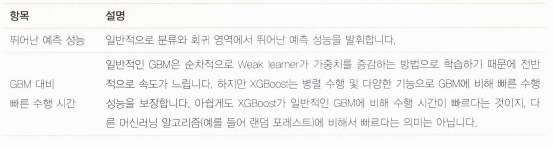


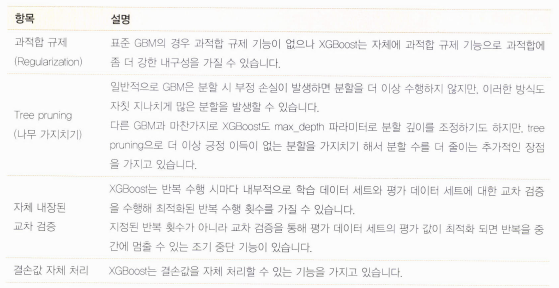
<br><br>
- XGBoost 파이썬 패키지 "xgboost"는 사이킷런이 아닌 별도의 API 기반이어서 fit(), predict() 같은 사이킷런 고유의 아키텍처가 적용될 수 없고, 다양한 유틸리티와 함께 사용될 수 없었다.
- 사이킷런과 연동되는 래퍼 클래스 "XGBClassifier" "XGBRegressor" 제공 -> 사이킷런의 다른 estimator와 같은 사용법!

### XGBoost 설치

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

### XGBoost 하이퍼 파라미터
GBM과 유사한 하이퍼 파라미터 + 조기 중간(early stopping), 과적합 규제
<br><br>
#### __일반 파라미터__: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터로서 디폴트 파라미터 값을 바꾸는 경우는 거의 없음
- __booster__: gbtree(tree based model) 또는 gblinear(linear model) 선택, 디폴트는 gbtre<br><br>
- __silent__: 디폴트 0, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정<br><br>
- __nthread__: CPU의 실행 스레드 개수 조정, 디폴트는 CPU의 전체 스레드 사용. <br> 멀티 코어/스레드 CPU 시스템에서 전체 CPU를 사용하지 않고 일부만 사용해 ML을 구동하는 경우에 변경<br><br>


#### __부스터 파라미터__: 트리 최적화, 부스팅, regulization 등과 관련된 파라미터
- __eta [defualt=0.3, alias: learning_rate]__: GBM의 학습률과 같은 파라미터. 0부터 1사이 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값. 파이썬 래퍼 기반의 xgboost를 이용할 경우 디폴트 0.3, 사이킷런 래퍼 클래스를 이용할 경우 eta는 learning_rate 파라미터로 대체되며 디폴트 0.1
보통은 0.1에서 0.2 값을 선호한다.<br><br>
- __num_boost_rounds__: GBM의 n_estimators와 같은 파라미터<br><br>
- __min_child_weight[defualt=1]__: GBM의 min_child_leaf와 유사함. 과적합 조절을 위해 사용<br><br>
- __gamma[default=0, alias: min_split_loss]__: 트리의 리프 노드를 추가적으로 나눌지 결정할 최소 손실 감소 값. 해당 값보다 큰 손실이 감소된 경우에 리프 노드를 분리한다. 값이 클수록 과적합 감소 효과가 있음.<br><br>
- __max_depth[default=6]__: 트리 기반 알고리즘의 max_depth와 같음. 0: 깊이 제한 x . 값이 높으면 특정 피처 조건에 특화되어 룰 조건이 만들어지므로 과적합 가능성이 높아지며 보통은 3~10 값을 지정한다.<br><br>
- __sub_sample[default=1]__: GBM의 subsample과 동일. 트리가 커져 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정한다. sub_sample=0.5로 지정하면 전체 데이터 절반을 트리 생성에 사용한다. 0부터 1 사이 값이 지정 가능하나 보통 0.5부터 1 사이 값을 사용<br><br>
- __colsample_bytree[default=1]__: GBM max_features와 유사. 트리 생성에 필요한 피처를 임의로 샘플링 하는데 사용한다. 피처가 매우 많은 경우 과적합 조정에 사용.<br><br>
- __lambda[default=1, alias: reg_lambda]__: L2 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.<br><br>
- __alpha[default=0, alias: reg_alpha]__: L1 Regularization 적용 값. 피처 개수가 많을 경우 적용을 검토하며 값이 크루록 과적합 감소 효과가 있다.<br><br>
- __scale_pos_weight[default=1]__: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터<br><br>


#### __학습 태스크 파라미터__: 학습 수행 시 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터
- __objective__: 최솟값을 가져야할 손실 함수 정의. XGBoost는 많은 유형의 손실함수를 사용할 수 있다. 주로 사용되는 손실합수는 이진 분류인지 다중 분류인지에 따라 다름.<br><br>
- __binary:logistic__: 이진 분류일 때 적용<br><br>
- __multi:softmax__: 다중 분류일 때 적용. 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class 파라미터를 지정해야 한다.<br><br>
- __multi:softprob__: multi:softmax와 유사하지만 개별 레이블 클래스의 해당되는 예측 확률을 반환.<br><br>
- __eval_metric__: 검증에 사용되는 함수 정의. 기본 값은 회귀인 경우 rmse, 분류인 경우 error 
    - rmse: Root Mean Square Error
    - mae: Mean Absolute Error
    - logloss: Negative log-likelihood
    - error: Binary classification error rate (0.5 threshold)
    - merror: Multiclass classification error rate
    - mlogloss: Multiclass logloss
    - auc: Area under the curve
---

__과적합 문제가 생기는 경우__
- eta 값 낮추기(0.01 ~ 0.1). eta 값을 낮출 경우 num_round(n_estimators)는 높여줘야 한다.
- max_depth 값 낮추기
- min_child_weight 값 높이기
- gamma 값 높이기
- subsample 과 colsample_bytree 조정도 트리가 복잡하게 생성되는 것을 막아 과적합 문제에 도움 될 수 있다.
---
- XGBoost 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있고, GBM에서 부족한 다른 여러 가지 성능 향상 기능이 있다. <br>
- XGBoost와 LightGBM은 모두 조기 중단 기능이 있어서 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더이상 개선되지 않으면 학습을 중단해 수행 시간을 개선할 수 있다. 

In [2]:
import xgboost
print(xgboost.__version__) 

0.90


### XGBoost 적용 - 위스콘신 유방암 예측
종양의 다양한 피처에 따라 악성종양(malignant)인지 일반 양성종양(benign)인지 XGBoost를 이용해 예측

In [2]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset=load_breast_cancer()
X_features=dataset.data
y_label=dataset.target
cancer_df=pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


- target 레이블에서 악성 'malignant'=0, 양성 'benign'=1

In [3]:
print(dataset.target_names)
print(cancer_df['target'].value_counts()) 

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


- 양성(1) 357개, 악성(0) 212개

In [4]:
# 전체 데이터 중 80% 학습 데이터, 20% 테스트 데이터
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape) 

(455, 30) (114, 30)


- XGBoost는 사이킷런과 달리 학습, 테스트용 데이터 세트를 별도의 객체인 DMatrix로 생성


In [5]:
# 넘파이 형태의 학습/테스트 데이터 세트를 DMatrix로 변환
dtrain=xgb.DMatrix(data=X_train, label=y_train)
dtest=xgb.DMatrix(data=X_test, label=y_test) 

In [6]:
# 파라미터 설정
params={'max_depth':3, # 트리 최대 깊이 3
        'eta': 0.1,    # 학습률 0.1 (XGBClassifier를 사용할 경우 learning_rate)
        'objective':'binary:logistic',  # 예제 데이터가 이진 분류이므로 목적합수는 이진 로지스틱
        'eval_metric':'logloss',        # 오류 함수의 평가 성능 지표 logloss
        'early_stoppings':100}          # 성능 개선이 없는 경우 조기중단할 수 있는 최소 반복 횟수 100회
num_rounds=400         # 부스팅 반복 횟수 400

__early_stopping_rounds__ 파라미터를 설정해 조기중단 하기 위해서는 반드시 eval_set과 eval_metirc이 함께 설정되어야 한다. 
- eval_set은 성능 평가를 수행할 평가용 데이터 세트를 설정
- eval_metric은 평가 세트에 적용할 성능 평가 방법으로, 분류일 경우 주로 error, logloss를 적용한다 


In [7]:
# train 데이터 세트는 'train', evaluation 데이터 세트는 'eval'로 표시
wlist=[(dtrain, 'train'), (dtest, 'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist) 

[0]	train-logloss:0.609688	eval-logloss:0.61352
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321221	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logloss:0.133985	eval-logloss:0.181818
[18]	train-logloss:0.125599	eval-logloss:0.174729
[19]	train-logloss:0.117286	eval-logloss:0.167657
[20]	train-logl

[164]	train-logloss:0.0072	eval-logloss:0.087777
[165]	train-logloss:0.00718	eval-logloss:0.087517
[166]	train-logloss:0.007161	eval-logloss:0.087542
[167]	train-logloss:0.007142	eval-logloss:0.087642
[168]	train-logloss:0.007122	eval-logloss:0.08739
[169]	train-logloss:0.007103	eval-logloss:0.087377
[170]	train-logloss:0.007084	eval-logloss:0.087298
[171]	train-logloss:0.007065	eval-logloss:0.087368
[172]	train-logloss:0.007047	eval-logloss:0.087395
[173]	train-logloss:0.007028	eval-logloss:0.087385
[174]	train-logloss:0.007009	eval-logloss:0.087132
[175]	train-logloss:0.006991	eval-logloss:0.087159
[176]	train-logloss:0.006973	eval-logloss:0.086955
[177]	train-logloss:0.006955	eval-logloss:0.087053
[178]	train-logloss:0.006937	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.086973
[180]	train-logloss:0.006901	eval-logloss:0.087038
[181]	train-logloss:0.006884	eval-logloss:0.086799
[182]	train-logloss:0.006866	eval-logloss:0.086826
[183]	train-logloss:0.006849	eval-log

[326]	train-logloss:0.005354	eval-logloss:0.08578
[327]	train-logloss:0.005348	eval-logloss:0.085857
[328]	train-logloss:0.005342	eval-logloss:0.085939
[329]	train-logloss:0.005336	eval-logloss:0.085825
[330]	train-logloss:0.00533	eval-logloss:0.085869
[331]	train-logloss:0.005324	eval-logloss:0.085893
[332]	train-logloss:0.005318	eval-logloss:0.085922
[333]	train-logloss:0.005312	eval-logloss:0.085842
[334]	train-logloss:0.005306	eval-logloss:0.085735
[335]	train-logloss:0.0053	eval-logloss:0.085816
[336]	train-logloss:0.005294	eval-logloss:0.085892
[337]	train-logloss:0.005288	eval-logloss:0.085936
[338]	train-logloss:0.005283	eval-logloss:0.08583
[339]	train-logloss:0.005277	eval-logloss:0.085909
[340]	train-logloss:0.005271	eval-logloss:0.085831
[341]	train-logloss:0.005265	eval-logloss:0.085727
[342]	train-logloss:0.00526	eval-logloss:0.085678
[343]	train-logloss:0.005254	eval-logloss:0.085721
[344]	train-logloss:0.005249	eval-logloss:0.085796
[345]	train-logloss:0.005243	eval-log

train()으로 학습을 수행하면 train-logloss와 eval-logloss가 지속적으로 감소한다. 
<br><br>
예측을 위해 predict() 사용, 예측 결과를 추정할 수 있는 확률 값을 반환한다.
- 이진 분류이므로 0.5보다 크면 1, 그렇지 않으면 0으로 예측 값을 결정하는 로직 추가

In [8]:
pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확값으로 표시됨')
print(np.round(pred_probs[:10], 3)) 

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값을 결정해 리스트 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10]) 

predict() 수행 결괏값을 10개만 표시, 예측 확값으로 표시됨
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [10]:
# 3장 평가에서 만든 get_clf_eval() 함수를 적용해 예측 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [12]:
get_clf_eval(y_test, preds, pred_probs)  

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


시각화 __plot_importance()__ 피처의 중요도를 막대 그래프 형식으로 나타낸다.
- f1 스코어를 기반으로 각 피처의 중요도를 나타낸다.
- 앞에서 학습이 완료된 모델 객체 및 맷플롯립의 ax객체를 파라미터로 입력한다.


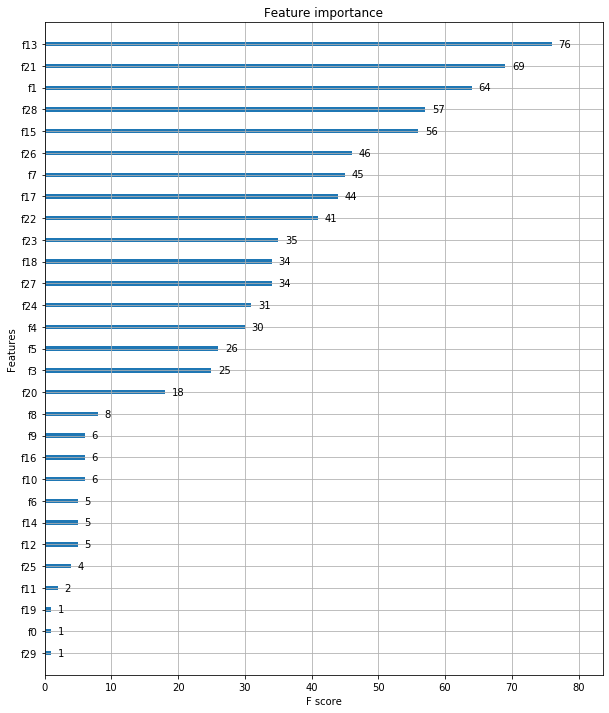

In [13]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax) 

__to_graphviz()__를 이용해 규칙 트리 구조를 그릴 수 있음. ** graphviz 설치돼 있어야 함

XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 cv()로 제공한다. 파라미터 설명
- params (dict): 부스터 파라미터
- dtrain (DMatirx): 학습 데이터
- num_boost_round (int): 부스팅 반복 횟수
- nfold (int): CV 폴드 개수
- stratified (bool): CV 수행 시 층화 표본 추출(stratified sampling) 수행 여부
- metrics (string or list of strings): CV 수행 시 모니터링할 성능 평가 지표
- early_stopping_rounds (int): 조기 중단을 활성화, 반복 횟수 지정
<br><br>

xgb.cv의 반환 값은 DataFrame 형태이다.

### 사이킷런 래퍼 XGBoost의 개요 및 적용
사이킷런 전용의 XGBoost 래퍼 클래스  <br>다른 사이킷런의 유틸리티를 그대로 사용할 수 있기 때문에 알고리즘 클래스만 XGBoost 래퍼 클래스로 바꾸면 기존 프로그램을 그대로 사용할 수 있다. 
- 분류를 위한 XGBClassifier
- 회귀를 위한 XGBRegressor
<br><br>

기존의 xgboost 모듈에서 사용하던 파라미터 몇 가지가 변경 됨
- eat > learning_rate
- sub_sample > subsample
- lambda > reg_lambda
- alpha > reg_alpha

xgboost의 n_estimators & num_boost_round는 서로 동일한 파라미터, 동시에 사용되면
<br>
__파이썬 XGBoost__에서는 num_boost_round를 적용하고, __사이킷런 XGBoost__에서는 n_estimators를 적용한다. 

---

위스콘신 유방암 데이터 세트를 __사이킷런의 XGBClassifier__를 이용해 예측
<br>
- 파이썬 XGBoost와 동일한 하이퍼 파라미터 적용, 앞의 X_train, X_test, y_train, y_test 사용

In [17]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds=xgb_wrapper.predict(X_test) 
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1] 

In [18]:
get_clf_eval(y_test, w_preds, w_pred_proba) 

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


- 앞의 파이썬 XGBoost와 동일한 결과가 나온다. 
<br><br>
- 사이킷런 XGBoost도 조기 중단 수행할 수 있음. fit()에 관련 파라미터 입력!
    - early_stopping_rounds 반복횟수 정의
    - eval_metric 조기 중단을 위한 평가 지표
    - eval_set 성능 평가를 수행할 데이터 세트

In [19]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', 
               eval_set=evals, verbose=True)
ws100_preds=xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1] 

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

- 400번이 아닌 311번만 반복한 후 학습을 완료함. 
- 211부터 311까지 100번동안 성능 평가 지수가 향상되지 않아서 조기 중단

In [20]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba) 

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


- 조기중단 설정 안했을 때보다 성능이 떨어지지만 큰 차이는 안 남

In [22]:
# early_stopping_rounds를 10으로 설정하고 재학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds=xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba) 

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


- 62번 반복 후 조기 종료
- 52부터 62까지 성능 평가 지수가 향상되지 않아 조기 종료함. 

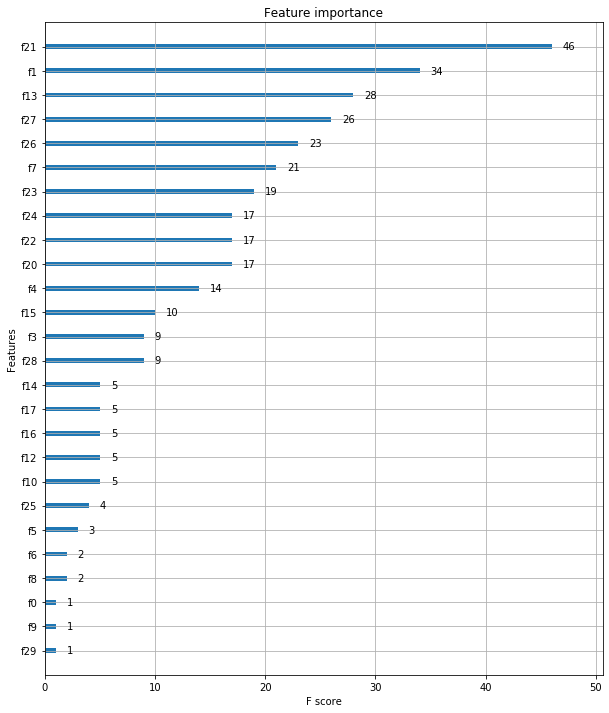

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
# 사이킷런 Wrapper 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax) 

## __04_07 LightGBM__
---
- XGBoost보다 학습에 걸리는 시간과 메모리 사용량이 상대적으로 적다.
- 기능상의 다양성이 더 많지만 1만 건 이하의 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다.
<br><br>
- 리프 중심 트리 분할(Leaf Wise) 방식을 사용. 트리의 균형을 맞추지 않고 최대 손실 값(Max data loss)를 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 균형트리를 만듦.<br>
예측 오류 손실을 최소화할 수 있다.
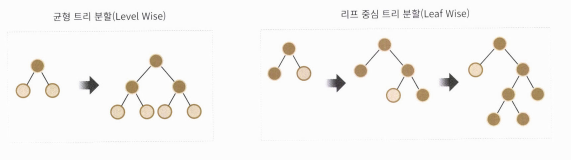
<br><br>
- 카테고리형 피처의 자동 변환, 최적 분할도 가능!


---
#### LightGBM 하이퍼 파라미터 
__주요 파라미터__
- __num_iterations__[default=100]: 반복 수행하려는 트리의 개수 지정. 클수록 예측 성능이 높아지지만 너무 크면 과적합으로 성능이 저하될 수도 있음. XGBoost의 n_estimators와 같은 파라미터<br><br>
- __learning_rate__[default=0.1]: 0과 1사이 값을 지정해 부스팅 스텝을 반복적으로 수행할 때 업뎃되는 학습률 값. GBM과 XGBoost의 learning_rate와 같은 파라미터<br><br>
- __max_depth__[default=-1]: 0보다 작은 값을 지정하면 트리 깊이에 제한이 없음. 트리 기반 알고리즘의 max_depth와 같은 파라미터.<br><br>
- __min_data_in_leaf__[default=20]:최종 결정 클래스인 리프 노드가 되기 위해 필요한 최소한의 레코드 수, 과적합을 제어하기 위함. 결정 트리의 min_samples_leaf와 같은 파라미터<br><br>
- __num_leaves__[default=31]: 하나의 트리가 가질 수 있는 최대 리프 개수<br><br>
- __boosting__[default=gbdt]: 부스팅 트리를 생성하는 알고리즘 기술 
    - gbdt: 일반적인 그래디언트 부스팅 결정 트리
    - rf: 랜덤 포레스트<br><br>
- __bagging_fraction__[default=1.0]: 트리가 커져 과적합되는 걸 제어하기 위해 데이터 샘플링하는 비율을 지정. sub_sample<br><br>
- __feature_fraction__[default=1.0]: 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율. 과적합을 막기 위해 사용한다. <br><br>
- __lambda_l2__[default=0.0]: L2 regulation 제어를 위한 값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.<br><br> 
- __lambda_l1__[default=0.0]: L1 regulation 제어를 위한 값. L2와 마찬가지로 과적합 제어를 위한 것.<br><br>

---
#### Learning Task 파라미터

- __objective__: 최솟값을 가져야 할 손실함수 정의. 애플리케이션 유형(회귀, 다중 클래스 분류, 이진 분류)에 따라 손실함수가 지정된다. XGBoost의 objective 파라미터와 동일. 
<br><br>
---

### 하이퍼 파라미터 튜닝 방안
num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안
<br><br>
- num_leaves는 개별 트리가 가질 수 있는 최대 리프의 개수, 모델의 복잡도를 제어하는 주요 파라미터이다. 
일반적으로 num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델이 복잡해서 과적합 영향도가 커진다.
<br><br>
- min_data_in_leaf는 사이킷런에서 min_child_samples로 이름이 바뀐다. 과적합을 개선하기 위한 중요한 파라미터로, num_leaves와 학습 데이터의 크기에 따라 달라지지만 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지한다.
<br><br>
- max_depth는 깊이의 크기를 제어한다. 앞의 두 파라미터와 결합해 과적합을 개선하는 데 사용한다.
<br><br>
- learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝방안으로, 이를 적용해도 좋지만, n_estimators를 너무 크게 하면 과적합될 수 있다. 
---

### 파이썬 LightGBM과 사이킷런 XGBoost & LightGBM 비교
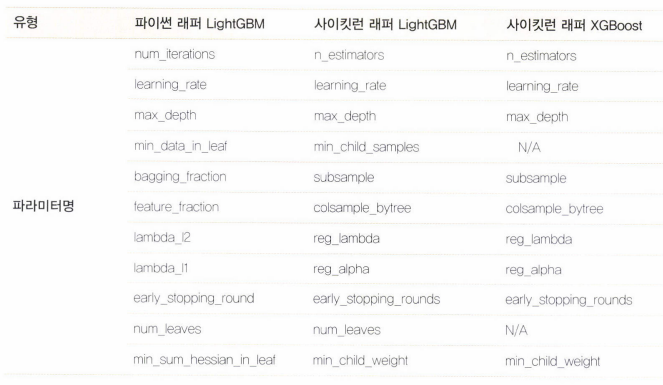

---

### LightGBM 적용 - 위스콘신 유방암 예측

In [24]:
# LightGBM의 파이썬 패키지 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset=load_breast_cancer()
ftr=dataset.data
target=dataset.target

# 전체 데이터 중 학습 80% 테스트 20%로 분할
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞의 XGBoost와 동일하게 n_estimators 400으로 설정
lgbm_wrapper=LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals=[(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', 
                eval_set=evals, verbose=True)
preds=lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1] 

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

- 조기 중단으로 147번만 반복하고 종료

In [25]:
get_clf_eval(y_test, preds, pred_proba) 

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9926


- LigthGBM도 시각화할 수 있는 내장 API제공, __plot_importance()__

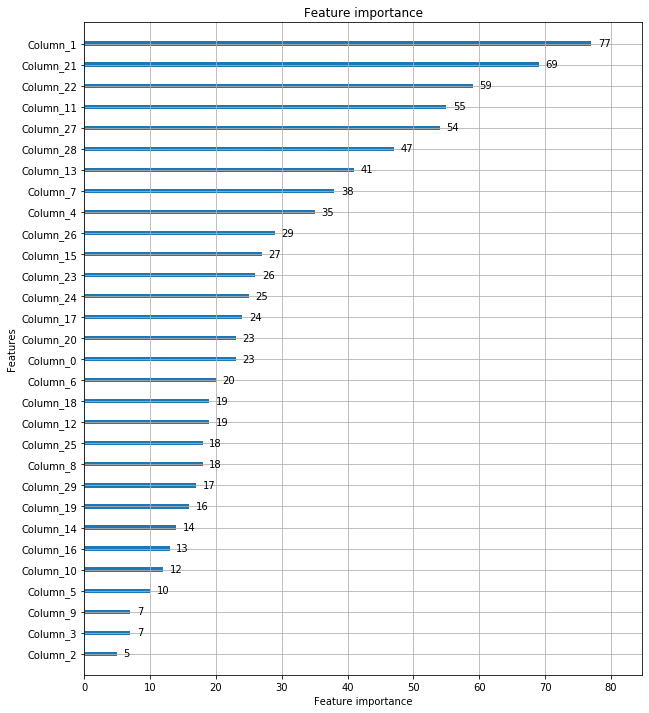

In [26]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax) 

## __04_08 분류 실습 - 캐글 산탄데르 고객 만족 예측__

캐글 - 산탄데르 은행의 이름이 익명 처리된 데이터.<br> 
클래스 레이블 명은 TARGET으로 1이면 불만을 가진 고객, 0이면 만족하는 고객.<br>
모델의 성능 평가는 ROC-AUC로 평가한다.
<br><br>
https://www.kaggle.com/c/santander-customer-satisfaction/data

### 데이터 전처리
- 사이킷런 XGBoost 이용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cust_df=pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head() 

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
cust_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
# 전체 데이터에서 만족/불만족 비율 확인
print(cust_df['TARGET'].value_counts())
unsatisfaction_cnt=cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt=cust_df.TARGET.count()
print('unsatisfaction 비율 {0:.2f}'.format((unsatisfaction_cnt/total_cnt))) 

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfaction 비율 0.04


In [4]:
# 각 피처의 값 분포 확인
cust_df.describe() 

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


- -9999 값 개수 확인 > NaN 값을 변환한 것일 수도 있음

In [5]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리  / 레이블 칼럼은 DataFrame의 맨 마지막에 있어서 -1로 분리
X_features=cust_df.iloc[:,:-1]
y_labels=cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape)) 

피처 데이터 shape:(76020, 369)


In [6]:
# 학습/테스트 데이터 세트 분리
# 원본 데이터가 비대칭하기 때문에 Target값 분포도가 학습/테스트 데이터 세트에 비슷하게 추출됐는지 확인
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_features, y_labels, test_size=0.2, random_state=422)
train_cnt=y_train.count()
test_cnt=y_test.count()
print('학습 세트 shape: {0}, 테스트 세트 shape: {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt) 

학습 세트 shape: (60816, 369), 테스트 세트 shape: (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960734
1    0.039266
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.959221
1    0.040779
Name: TARGET, dtype: float64


### XGBoost 모델 학습 & 하이퍼 파라미터 튜닝
n_estimators=200 / early_stopping_rounds=50 / eval_metric='auc'

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators 500
xgb_clf=XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표 auc, 조기 중단 파라미터 100
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', 
           eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score=roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) 

[0]	validation_0-auc:0.799927	validation_1-auc:0.784126
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.810411	validation_1-auc:0.795429
[2]	validation_0-auc:0.811408	validation_1-auc:0.796751
[3]	validation_0-auc:0.818958	validation_1-auc:0.803498
[4]	validation_0-auc:0.818238	validation_1-auc:0.802575
[5]	validation_0-auc:0.822349	validation_1-auc:0.805252
[6]	validation_0-auc:0.822037	validation_1-auc:0.805025
[7]	validation_0-auc:0.823576	validation_1-auc:0.807912
[8]	validation_0-auc:0.822368	validation_1-auc:0.806989
[9]	validation_0-auc:0.823472	validation_1-auc:0.807838
[10]	validation_0-auc:0.823343	validation_1-auc:0.808303
[11]	validation_0-auc:0.82338	validation_1-auc:0.807744
[12]	validation_0-auc:0.823478	validation_1-auc:0.808247
[13]	validation_0-auc:0.825309	validation_1-auc:0.810758
[14]	validation_0-auc:0.825224	validation_1-auc:0.81101

[141]	validation_0-auc:0.862551	validation_1-auc:0.835335
[142]	validation_0-auc:0.862686	validation_1-auc:0.835284
[143]	validation_0-auc:0.862865	validation_1-auc:0.835289
[144]	validation_0-auc:0.862915	validation_1-auc:0.835288
[145]	validation_0-auc:0.863286	validation_1-auc:0.835204
[146]	validation_0-auc:0.863401	validation_1-auc:0.835256
[147]	validation_0-auc:0.863531	validation_1-auc:0.835208
[148]	validation_0-auc:0.863587	validation_1-auc:0.835222
[149]	validation_0-auc:0.863594	validation_1-auc:0.835184
[150]	validation_0-auc:0.86365	validation_1-auc:0.835188
[151]	validation_0-auc:0.863732	validation_1-auc:0.835168
[152]	validation_0-auc:0.863857	validation_1-auc:0.835324
[153]	validation_0-auc:0.863929	validation_1-auc:0.83515
[154]	validation_0-auc:0.863999	validation_1-auc:0.835179
[155]	validation_0-auc:0.86416	validation_1-auc:0.835263
[156]	validation_0-auc:0.864257	validation_1-auc:0.835301
[157]	validation_0-auc:0.864318	validation_1-auc:0.835356
[158]	validation_

[283]	validation_0-auc:0.875667	validation_1-auc:0.834418
[284]	validation_0-auc:0.875738	validation_1-auc:0.834481
[285]	validation_0-auc:0.875788	validation_1-auc:0.834489
[286]	validation_0-auc:0.875966	validation_1-auc:0.834565
[287]	validation_0-auc:0.876081	validation_1-auc:0.834582
[288]	validation_0-auc:0.876127	validation_1-auc:0.834546
[289]	validation_0-auc:0.876136	validation_1-auc:0.834535
[290]	validation_0-auc:0.876146	validation_1-auc:0.834521
[291]	validation_0-auc:0.87617	validation_1-auc:0.834488
[292]	validation_0-auc:0.876193	validation_1-auc:0.834511
[293]	validation_0-auc:0.876322	validation_1-auc:0.834347
[294]	validation_0-auc:0.876492	validation_1-auc:0.834321
[295]	validation_0-auc:0.87666	validation_1-auc:0.834222
[296]	validation_0-auc:0.87675	validation_1-auc:0.834205
[297]	validation_0-auc:0.876789	validation_1-auc:0.834157
[298]	validation_0-auc:0.876974	validation_1-auc:0.834147
[299]	validation_0-auc:0.876993	validation_1-auc:0.834182
[300]	validation_

In [8]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf=XGBClassifier(n_estimators=100)
params={'max_depth':[5, 7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 cv 지정하지 않음.
gridcv=GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', 
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('Grid Search CV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score=roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) 

[0]	validation_0-auc:0.724457	validation_1-auc:0.693756
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816897	validation_1-auc:0.793676
[2]	validation_0-auc:0.808011	validation_1-auc:0.780657
[3]	validation_0-auc:0.821889	validation_1-auc:0.79589
[4]	validation_0-auc:0.82882	validation_1-auc:0.806187
[5]	validation_0-auc:0.825598	validation_1-auc:0.801932
[6]	validation_0-auc:0.822909	validation_1-auc:0.800062
[7]	validation_0-auc:0.829521	validation_1-auc:0.806427
[8]	validation_0-auc:0.835131	validation_1-auc:0.811695
[9]	validation_0-auc:0.834533	validation_1-auc:0.809939
[10]	validation_0-auc:0.838309	validation_1-auc:0.812698
[11]	validation_0-auc:0.839918	validation_1-auc:0.813854
[12]	validation_0-auc:0.841672	validation_1-auc:0.815707
[13]	validation_0-auc:0.841186	validation_1-auc:0.816073
[14]	validation_0-auc:0.840498	validation_1-auc:0.815265


[40]	validation_0-auc:0.859622	validation_1-auc:0.825105
[41]	validation_0-auc:0.859642	validation_1-auc:0.8246
[42]	validation_0-auc:0.860761	validation_1-auc:0.82528
[43]	validation_0-auc:0.861267	validation_1-auc:0.825237
[44]	validation_0-auc:0.862108	validation_1-auc:0.826623
[45]	validation_0-auc:0.86234	validation_1-auc:0.825994
[46]	validation_0-auc:0.863231	validation_1-auc:0.827013
[47]	validation_0-auc:0.86403	validation_1-auc:0.82779
[48]	validation_0-auc:0.864729	validation_1-auc:0.827558
[49]	validation_0-auc:0.865043	validation_1-auc:0.827297
[50]	validation_0-auc:0.865061	validation_1-auc:0.826769
[51]	validation_0-auc:0.866068	validation_1-auc:0.827396
[52]	validation_0-auc:0.86687	validation_1-auc:0.827926
[53]	validation_0-auc:0.867456	validation_1-auc:0.828059
[54]	validation_0-auc:0.868142	validation_1-auc:0.828794
[55]	validation_0-auc:0.868508	validation_1-auc:0.828597
[56]	validation_0-auc:0.868958	validation_1-auc:0.829236
[57]	validation_0-auc:0.869643	validat

[82]	validation_0-auc:0.875741	validation_1-auc:0.833947
[83]	validation_0-auc:0.876064	validation_1-auc:0.833845
[84]	validation_0-auc:0.876383	validation_1-auc:0.834005
[85]	validation_0-auc:0.87687	validation_1-auc:0.833928
[86]	validation_0-auc:0.876933	validation_1-auc:0.833852
[87]	validation_0-auc:0.877094	validation_1-auc:0.833918
[88]	validation_0-auc:0.877402	validation_1-auc:0.833887
[89]	validation_0-auc:0.877462	validation_1-auc:0.833899
[90]	validation_0-auc:0.877811	validation_1-auc:0.833883
[91]	validation_0-auc:0.877908	validation_1-auc:0.833893
[92]	validation_0-auc:0.877959	validation_1-auc:0.833929
[93]	validation_0-auc:0.878222	validation_1-auc:0.834111
[94]	validation_0-auc:0.878391	validation_1-auc:0.834032
[95]	validation_0-auc:0.878575	validation_1-auc:0.834123
[96]	validation_0-auc:0.878813	validation_1-auc:0.83419
[97]	validation_0-auc:0.87898	validation_1-auc:0.834273
[98]	validation_0-auc:0.879065	validation_1-auc:0.834323
[99]	validation_0-auc:0.879494	val

[21]	validation_0-auc:0.848174	validation_1-auc:0.819387
[22]	validation_0-auc:0.8469	validation_1-auc:0.817198
[23]	validation_0-auc:0.848168	validation_1-auc:0.819504
[24]	validation_0-auc:0.849664	validation_1-auc:0.821314
[25]	validation_0-auc:0.849735	validation_1-auc:0.820191
[26]	validation_0-auc:0.849565	validation_1-auc:0.819663
[27]	validation_0-auc:0.851118	validation_1-auc:0.821951
[28]	validation_0-auc:0.852674	validation_1-auc:0.823318
[29]	validation_0-auc:0.852878	validation_1-auc:0.822873
[30]	validation_0-auc:0.85435	validation_1-auc:0.824199
[31]	validation_0-auc:0.855456	validation_1-auc:0.824973
[32]	validation_0-auc:0.85577	validation_1-auc:0.824683
[33]	validation_0-auc:0.855974	validation_1-auc:0.824587
[34]	validation_0-auc:0.856088	validation_1-auc:0.823864
[35]	validation_0-auc:0.8574	validation_1-auc:0.824749
[36]	validation_0-auc:0.858388	validation_1-auc:0.825205
[37]	validation_0-auc:0.858597	validation_1-auc:0.825262
[38]	validation_0-auc:0.858894	valida

[63]	validation_0-auc:0.869408	validation_1-auc:0.832622
[64]	validation_0-auc:0.869821	validation_1-auc:0.832908
[65]	validation_0-auc:0.870097	validation_1-auc:0.832797
[66]	validation_0-auc:0.870212	validation_1-auc:0.832814
[67]	validation_0-auc:0.870689	validation_1-auc:0.832922
[68]	validation_0-auc:0.870973	validation_1-auc:0.833054
[69]	validation_0-auc:0.871113	validation_1-auc:0.833191
[70]	validation_0-auc:0.871271	validation_1-auc:0.833307
[71]	validation_0-auc:0.871658	validation_1-auc:0.833445
[72]	validation_0-auc:0.87171	validation_1-auc:0.833404
[73]	validation_0-auc:0.871933	validation_1-auc:0.833347
[74]	validation_0-auc:0.87215	validation_1-auc:0.833347
[75]	validation_0-auc:0.872303	validation_1-auc:0.833405
[76]	validation_0-auc:0.872391	validation_1-auc:0.833113
[77]	validation_0-auc:0.872482	validation_1-auc:0.833104
[78]	validation_0-auc:0.872674	validation_1-auc:0.83302
[79]	validation_0-auc:0.872922	validation_1-auc:0.833112
[80]	validation_0-auc:0.873414	val

[2]	validation_0-auc:0.815136	validation_1-auc:0.790746
[3]	validation_0-auc:0.823161	validation_1-auc:0.798984
[4]	validation_0-auc:0.830245	validation_1-auc:0.806846
[5]	validation_0-auc:0.826066	validation_1-auc:0.800092
[6]	validation_0-auc:0.82592	validation_1-auc:0.7989
[7]	validation_0-auc:0.830298	validation_1-auc:0.803878
[8]	validation_0-auc:0.834852	validation_1-auc:0.810032
[9]	validation_0-auc:0.832436	validation_1-auc:0.806091
[10]	validation_0-auc:0.836186	validation_1-auc:0.809754
[11]	validation_0-auc:0.838659	validation_1-auc:0.811833
[12]	validation_0-auc:0.840181	validation_1-auc:0.81288
[13]	validation_0-auc:0.838707	validation_1-auc:0.811366
[14]	validation_0-auc:0.838877	validation_1-auc:0.810648
[15]	validation_0-auc:0.841009	validation_1-auc:0.812268
[16]	validation_0-auc:0.843725	validation_1-auc:0.815462
[17]	validation_0-auc:0.84585	validation_1-auc:0.816833
[18]	validation_0-auc:0.847875	validation_1-auc:0.819376
[19]	validation_0-auc:0.846074	validation_1-

[44]	validation_0-auc:0.861236	validation_1-auc:0.829368
[45]	validation_0-auc:0.861202	validation_1-auc:0.828967
[46]	validation_0-auc:0.862274	validation_1-auc:0.829879
[47]	validation_0-auc:0.862969	validation_1-auc:0.8311
[48]	validation_0-auc:0.863514	validation_1-auc:0.830812
[49]	validation_0-auc:0.86408	validation_1-auc:0.82994
[50]	validation_0-auc:0.864357	validation_1-auc:0.829774
[51]	validation_0-auc:0.865152	validation_1-auc:0.830209
[52]	validation_0-auc:0.865516	validation_1-auc:0.830776
[53]	validation_0-auc:0.866141	validation_1-auc:0.831366
[54]	validation_0-auc:0.866588	validation_1-auc:0.83223
[55]	validation_0-auc:0.86713	validation_1-auc:0.832342
[56]	validation_0-auc:0.86743	validation_1-auc:0.832737
[57]	validation_0-auc:0.867864	validation_1-auc:0.832935
[58]	validation_0-auc:0.868387	validation_1-auc:0.832797
[59]	validation_0-auc:0.86848	validation_1-auc:0.832863
[60]	validation_0-auc:0.868885	validation_1-auc:0.832957
[61]	validation_0-auc:0.869081	validati

[86]	validation_0-auc:0.87544	validation_1-auc:0.833941
[87]	validation_0-auc:0.875521	validation_1-auc:0.834023
[88]	validation_0-auc:0.875669	validation_1-auc:0.834054
[89]	validation_0-auc:0.875725	validation_1-auc:0.834031
[90]	validation_0-auc:0.876047	validation_1-auc:0.834012
[91]	validation_0-auc:0.876269	validation_1-auc:0.833806
[92]	validation_0-auc:0.876461	validation_1-auc:0.83386
[93]	validation_0-auc:0.876599	validation_1-auc:0.833883
[94]	validation_0-auc:0.876688	validation_1-auc:0.833928
[95]	validation_0-auc:0.876747	validation_1-auc:0.834062
[96]	validation_0-auc:0.877033	validation_1-auc:0.833942
[97]	validation_0-auc:0.877219	validation_1-auc:0.833935
[98]	validation_0-auc:0.877399	validation_1-auc:0.833873
[99]	validation_0-auc:0.877461	validation_1-auc:0.833855
[0]	validation_0-auc:0.729956	validation_1-auc:0.696326
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30

[26]	validation_0-auc:0.867303	validation_1-auc:0.820644
[27]	validation_0-auc:0.869192	validation_1-auc:0.823135
[28]	validation_0-auc:0.871186	validation_1-auc:0.823759
[29]	validation_0-auc:0.87173	validation_1-auc:0.823271
[30]	validation_0-auc:0.873033	validation_1-auc:0.824356
[31]	validation_0-auc:0.874622	validation_1-auc:0.825241
[32]	validation_0-auc:0.87542	validation_1-auc:0.825322
[33]	validation_0-auc:0.875933	validation_1-auc:0.825499
[34]	validation_0-auc:0.875941	validation_1-auc:0.824568
[35]	validation_0-auc:0.877912	validation_1-auc:0.826113
[36]	validation_0-auc:0.879531	validation_1-auc:0.827268
[37]	validation_0-auc:0.879988	validation_1-auc:0.826955
[38]	validation_0-auc:0.880621	validation_1-auc:0.826479
[39]	validation_0-auc:0.881525	validation_1-auc:0.825886
[40]	validation_0-auc:0.881689	validation_1-auc:0.825482
[41]	validation_0-auc:0.882313	validation_1-auc:0.825115
[42]	validation_0-auc:0.883755	validation_1-auc:0.826456
[43]	validation_0-auc:0.884283	va

[68]	validation_0-auc:0.897024	validation_1-auc:0.83115
[69]	validation_0-auc:0.897118	validation_1-auc:0.831314
[70]	validation_0-auc:0.897205	validation_1-auc:0.831511
[71]	validation_0-auc:0.897412	validation_1-auc:0.831414
[72]	validation_0-auc:0.897759	validation_1-auc:0.830958
[73]	validation_0-auc:0.897978	validation_1-auc:0.830813
[74]	validation_0-auc:0.89819	validation_1-auc:0.830979
[75]	validation_0-auc:0.89857	validation_1-auc:0.831247
[76]	validation_0-auc:0.898897	validation_1-auc:0.831286
[77]	validation_0-auc:0.898935	validation_1-auc:0.831484
[78]	validation_0-auc:0.899134	validation_1-auc:0.831552
[79]	validation_0-auc:0.899528	validation_1-auc:0.831643
[80]	validation_0-auc:0.899641	validation_1-auc:0.831416
[81]	validation_0-auc:0.900123	validation_1-auc:0.830996
[82]	validation_0-auc:0.900158	validation_1-auc:0.831043
[83]	validation_0-auc:0.900634	validation_1-auc:0.830914
[84]	validation_0-auc:0.900771	validation_1-auc:0.831011
[85]	validation_0-auc:0.900913	val

[11]	validation_0-auc:0.851952	validation_1-auc:0.817947
[12]	validation_0-auc:0.853981	validation_1-auc:0.819515
[13]	validation_0-auc:0.853636	validation_1-auc:0.81735
[14]	validation_0-auc:0.853551	validation_1-auc:0.816052
[15]	validation_0-auc:0.855586	validation_1-auc:0.816833
[16]	validation_0-auc:0.857437	validation_1-auc:0.818616
[17]	validation_0-auc:0.859615	validation_1-auc:0.819857
[18]	validation_0-auc:0.861009	validation_1-auc:0.821652
[19]	validation_0-auc:0.860213	validation_1-auc:0.820743
[20]	validation_0-auc:0.863195	validation_1-auc:0.822464
[21]	validation_0-auc:0.86278	validation_1-auc:0.820887
[22]	validation_0-auc:0.8623	validation_1-auc:0.819358
[23]	validation_0-auc:0.864098	validation_1-auc:0.82283
[24]	validation_0-auc:0.865713	validation_1-auc:0.823746
[25]	validation_0-auc:0.866398	validation_1-auc:0.82314
[26]	validation_0-auc:0.866426	validation_1-auc:0.822083
[27]	validation_0-auc:0.867993	validation_1-auc:0.823698
[28]	validation_0-auc:0.869678	valida

[53]	validation_0-auc:0.885078	validation_1-auc:0.831177
[54]	validation_0-auc:0.885882	validation_1-auc:0.832473
[55]	validation_0-auc:0.88635	validation_1-auc:0.832341
[56]	validation_0-auc:0.887021	validation_1-auc:0.832879
[57]	validation_0-auc:0.887513	validation_1-auc:0.833335
[58]	validation_0-auc:0.88803	validation_1-auc:0.833299
[59]	validation_0-auc:0.888077	validation_1-auc:0.833198
[60]	validation_0-auc:0.888459	validation_1-auc:0.833438
[61]	validation_0-auc:0.888853	validation_1-auc:0.833642
[62]	validation_0-auc:0.889301	validation_1-auc:0.833754
[63]	validation_0-auc:0.889791	validation_1-auc:0.833965
[64]	validation_0-auc:0.890012	validation_1-auc:0.834224
[65]	validation_0-auc:0.89013	validation_1-auc:0.834123
[66]	validation_0-auc:0.890188	validation_1-auc:0.834168
[67]	validation_0-auc:0.890688	validation_1-auc:0.834423
[68]	validation_0-auc:0.891141	validation_1-auc:0.835008
[69]	validation_0-auc:0.891257	validation_1-auc:0.834911
[70]	validation_0-auc:0.891288	val

[95]	validation_0-auc:0.899765	validation_1-auc:0.830589
[96]	validation_0-auc:0.900077	validation_1-auc:0.830488
[97]	validation_0-auc:0.900214	validation_1-auc:0.830532
[98]	validation_0-auc:0.900336	validation_1-auc:0.830374
[99]	validation_0-auc:0.900379	validation_1-auc:0.830404
[0]	validation_0-auc:0.753459	validation_1-auc:0.717944
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.824091	validation_1-auc:0.795523
[2]	validation_0-auc:0.822168	validation_1-auc:0.791764
[3]	validation_0-auc:0.832309	validation_1-auc:0.802344
[4]	validation_0-auc:0.837504	validation_1-auc:0.806336
[5]	validation_0-auc:0.836014	validation_1-auc:0.802158
[6]	validation_0-auc:0.83485	validation_1-auc:0.80058
[7]	validation_0-auc:0.840835	validation_1-auc:0.807613
[8]	validation_0-auc:0.84456	validation_1-auc:0.811019
[9]	validation_0-auc:0.843816	validation_1-auc:0.808733
[

[34]	validation_0-auc:0.872429	validation_1-auc:0.824803
[35]	validation_0-auc:0.874366	validation_1-auc:0.826304
[36]	validation_0-auc:0.875499	validation_1-auc:0.827569
[37]	validation_0-auc:0.875715	validation_1-auc:0.827188
[38]	validation_0-auc:0.875976	validation_1-auc:0.827114
[39]	validation_0-auc:0.876145	validation_1-auc:0.826197
[40]	validation_0-auc:0.876519	validation_1-auc:0.826064
[41]	validation_0-auc:0.876576	validation_1-auc:0.825789
[42]	validation_0-auc:0.878002	validation_1-auc:0.826694
[43]	validation_0-auc:0.878495	validation_1-auc:0.826449
[44]	validation_0-auc:0.879917	validation_1-auc:0.827895
[45]	validation_0-auc:0.879964	validation_1-auc:0.827494
[46]	validation_0-auc:0.881142	validation_1-auc:0.828032
[47]	validation_0-auc:0.881828	validation_1-auc:0.82833
[48]	validation_0-auc:0.882466	validation_1-auc:0.827858
[49]	validation_0-auc:0.882854	validation_1-auc:0.827656
[50]	validation_0-auc:0.882996	validation_1-auc:0.827312
[51]	validation_0-auc:0.883887	v

[76]	validation_0-auc:0.893887	validation_1-auc:0.833864
[77]	validation_0-auc:0.894141	validation_1-auc:0.833895
[78]	validation_0-auc:0.894888	validation_1-auc:0.83395
[79]	validation_0-auc:0.895205	validation_1-auc:0.833865
[80]	validation_0-auc:0.895318	validation_1-auc:0.83404
[81]	validation_0-auc:0.895362	validation_1-auc:0.833925
[82]	validation_0-auc:0.895418	validation_1-auc:0.833934
[83]	validation_0-auc:0.895624	validation_1-auc:0.834008
[84]	validation_0-auc:0.895794	validation_1-auc:0.834126
[85]	validation_0-auc:0.896018	validation_1-auc:0.834148
[86]	validation_0-auc:0.896356	validation_1-auc:0.834493
[87]	validation_0-auc:0.896474	validation_1-auc:0.834481
[88]	validation_0-auc:0.896851	validation_1-auc:0.834504
[89]	validation_0-auc:0.897025	validation_1-auc:0.834443
[90]	validation_0-auc:0.897311	validation_1-auc:0.834242
[91]	validation_0-auc:0.897518	validation_1-auc:0.834309
[92]	validation_0-auc:0.897831	validation_1-auc:0.834234
[93]	validation_0-auc:0.897853	va

[16]	validation_0-auc:0.846959	validation_1-auc:0.821955
[17]	validation_0-auc:0.847493	validation_1-auc:0.82315
[18]	validation_0-auc:0.848532	validation_1-auc:0.824724
[19]	validation_0-auc:0.849145	validation_1-auc:0.823862
[20]	validation_0-auc:0.850215	validation_1-auc:0.824633
[21]	validation_0-auc:0.850204	validation_1-auc:0.824555
[22]	validation_0-auc:0.851312	validation_1-auc:0.825499
[23]	validation_0-auc:0.851917	validation_1-auc:0.826003
[24]	validation_0-auc:0.852145	validation_1-auc:0.826282
[25]	validation_0-auc:0.853168	validation_1-auc:0.826726
[26]	validation_0-auc:0.853469	validation_1-auc:0.826406
[27]	validation_0-auc:0.854	validation_1-auc:0.826851
[28]	validation_0-auc:0.854685	validation_1-auc:0.827105
[29]	validation_0-auc:0.855813	validation_1-auc:0.827227
[30]	validation_0-auc:0.856107	validation_1-auc:0.827717
[31]	validation_0-auc:0.856519	validation_1-auc:0.827818
[32]	validation_0-auc:0.856914	validation_1-auc:0.828407
[33]	validation_0-auc:0.857548	vali

[58]	validation_0-auc:0.871444	validation_1-auc:0.834406
[59]	validation_0-auc:0.87193	validation_1-auc:0.834491
[60]	validation_0-auc:0.872517	validation_1-auc:0.834606
[61]	validation_0-auc:0.872761	validation_1-auc:0.834706
[62]	validation_0-auc:0.872932	validation_1-auc:0.835053
[63]	validation_0-auc:0.873254	validation_1-auc:0.83486
[64]	validation_0-auc:0.873898	validation_1-auc:0.834796
[65]	validation_0-auc:0.874092	validation_1-auc:0.835105
[66]	validation_0-auc:0.87418	validation_1-auc:0.835163
[67]	validation_0-auc:0.87451	validation_1-auc:0.83533
[68]	validation_0-auc:0.875049	validation_1-auc:0.835315
[69]	validation_0-auc:0.875328	validation_1-auc:0.835184
[70]	validation_0-auc:0.875425	validation_1-auc:0.835184
[71]	validation_0-auc:0.875477	validation_1-auc:0.835371
[72]	validation_0-auc:0.875474	validation_1-auc:0.835453
[73]	validation_0-auc:0.875593	validation_1-auc:0.835535
[74]	validation_0-auc:0.875748	validation_1-auc:0.835426
[75]	validation_0-auc:0.876004	valid

[1]	validation_0-auc:0.82181	validation_1-auc:0.806661
[2]	validation_0-auc:0.82498	validation_1-auc:0.808565
[3]	validation_0-auc:0.828694	validation_1-auc:0.806766
[4]	validation_0-auc:0.829545	validation_1-auc:0.806817
[5]	validation_0-auc:0.831125	validation_1-auc:0.808086
[6]	validation_0-auc:0.837109	validation_1-auc:0.812139
[7]	validation_0-auc:0.838021	validation_1-auc:0.81374
[8]	validation_0-auc:0.838179	validation_1-auc:0.814413
[9]	validation_0-auc:0.839595	validation_1-auc:0.813592
[10]	validation_0-auc:0.840061	validation_1-auc:0.814144
[11]	validation_0-auc:0.840927	validation_1-auc:0.816185
[12]	validation_0-auc:0.841199	validation_1-auc:0.815344
[13]	validation_0-auc:0.843622	validation_1-auc:0.81773
[14]	validation_0-auc:0.844878	validation_1-auc:0.818857
[15]	validation_0-auc:0.845193	validation_1-auc:0.818632
[16]	validation_0-auc:0.846342	validation_1-auc:0.820142
[17]	validation_0-auc:0.848238	validation_1-auc:0.823093
[18]	validation_0-auc:0.84872	validation_1-a

[43]	validation_0-auc:0.861787	validation_1-auc:0.832788
[44]	validation_0-auc:0.862338	validation_1-auc:0.83262
[45]	validation_0-auc:0.86315	validation_1-auc:0.832975
[46]	validation_0-auc:0.863546	validation_1-auc:0.833337
[47]	validation_0-auc:0.864011	validation_1-auc:0.833629
[48]	validation_0-auc:0.86446	validation_1-auc:0.833987
[49]	validation_0-auc:0.864826	validation_1-auc:0.833967
[50]	validation_0-auc:0.865227	validation_1-auc:0.834202
[51]	validation_0-auc:0.865744	validation_1-auc:0.834406
[52]	validation_0-auc:0.866193	validation_1-auc:0.834577
[53]	validation_0-auc:0.866444	validation_1-auc:0.834742
[54]	validation_0-auc:0.866804	validation_1-auc:0.834862
[55]	validation_0-auc:0.867047	validation_1-auc:0.834963
[56]	validation_0-auc:0.867717	validation_1-auc:0.835086
[57]	validation_0-auc:0.867998	validation_1-auc:0.8351
[58]	validation_0-auc:0.868505	validation_1-auc:0.835053
[59]	validation_0-auc:0.868851	validation_1-auc:0.835092
[60]	validation_0-auc:0.86898	valida

[92]	validation_0-auc:0.875323	validation_1-auc:0.833047
[93]	validation_0-auc:0.875513	validation_1-auc:0.833129
[94]	validation_0-auc:0.875713	validation_1-auc:0.833062
[95]	validation_0-auc:0.875809	validation_1-auc:0.833177
[96]	validation_0-auc:0.8761	validation_1-auc:0.833388
[97]	validation_0-auc:0.876176	validation_1-auc:0.83325
[98]	validation_0-auc:0.876409	validation_1-auc:0.833247
[99]	validation_0-auc:0.876603	validation_1-auc:0.833303
[0]	validation_0-auc:0.814286	validation_1-auc:0.792313
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.826213	validation_1-auc:0.805569
[2]	validation_0-auc:0.826515	validation_1-auc:0.805476
[3]	validation_0-auc:0.830828	validation_1-auc:0.808581
[4]	validation_0-auc:0.833159	validation_1-auc:0.811943
[5]	validation_0-auc:0.833754	validation_1-auc:0.812274
[6]	validation_0-auc:0.836315	validation_1-auc:0.81257

[32]	validation_0-auc:0.856288	validation_1-auc:0.829274
[33]	validation_0-auc:0.857237	validation_1-auc:0.829815
[34]	validation_0-auc:0.857942	validation_1-auc:0.829906
[35]	validation_0-auc:0.858319	validation_1-auc:0.82981
[36]	validation_0-auc:0.858775	validation_1-auc:0.829218
[37]	validation_0-auc:0.859089	validation_1-auc:0.829465
[38]	validation_0-auc:0.859466	validation_1-auc:0.829423
[39]	validation_0-auc:0.860115	validation_1-auc:0.829635
[40]	validation_0-auc:0.860443	validation_1-auc:0.829465
[41]	validation_0-auc:0.861161	validation_1-auc:0.829832
[42]	validation_0-auc:0.861879	validation_1-auc:0.82999
[43]	validation_0-auc:0.86248	validation_1-auc:0.830404
[44]	validation_0-auc:0.863172	validation_1-auc:0.830752
[45]	validation_0-auc:0.863804	validation_1-auc:0.830707
[46]	validation_0-auc:0.864435	validation_1-auc:0.83079
[47]	validation_0-auc:0.864789	validation_1-auc:0.831278
[48]	validation_0-auc:0.865313	validation_1-auc:0.831665
[49]	validation_0-auc:0.865722	vali

[74]	validation_0-auc:0.87268	validation_1-auc:0.833342
[75]	validation_0-auc:0.872955	validation_1-auc:0.833215
[76]	validation_0-auc:0.87299	validation_1-auc:0.833304
[77]	validation_0-auc:0.873067	validation_1-auc:0.83334
[78]	validation_0-auc:0.873271	validation_1-auc:0.833524
[79]	validation_0-auc:0.873334	validation_1-auc:0.833433
[80]	validation_0-auc:0.873473	validation_1-auc:0.833425
[81]	validation_0-auc:0.873825	validation_1-auc:0.833342
[82]	validation_0-auc:0.874	validation_1-auc:0.833381
[83]	validation_0-auc:0.874189	validation_1-auc:0.833288
[84]	validation_0-auc:0.874313	validation_1-auc:0.833171
[85]	validation_0-auc:0.874439	validation_1-auc:0.833036
[86]	validation_0-auc:0.874653	validation_1-auc:0.832984
[87]	validation_0-auc:0.874855	validation_1-auc:0.832881
[88]	validation_0-auc:0.875012	validation_1-auc:0.832992
[89]	validation_0-auc:0.87543	validation_1-auc:0.832711
[90]	validation_0-auc:0.876022	validation_1-auc:0.832578
[91]	validation_0-auc:0.876309	validat

[17]	validation_0-auc:0.861672	validation_1-auc:0.823039
[18]	validation_0-auc:0.863233	validation_1-auc:0.824949
[19]	validation_0-auc:0.864059	validation_1-auc:0.825411
[20]	validation_0-auc:0.865391	validation_1-auc:0.825079
[21]	validation_0-auc:0.866125	validation_1-auc:0.824407
[22]	validation_0-auc:0.867225	validation_1-auc:0.825135
[23]	validation_0-auc:0.868134	validation_1-auc:0.82545
[24]	validation_0-auc:0.869062	validation_1-auc:0.82583
[25]	validation_0-auc:0.870325	validation_1-auc:0.826432
[26]	validation_0-auc:0.871702	validation_1-auc:0.826756
[27]	validation_0-auc:0.872964	validation_1-auc:0.827226
[28]	validation_0-auc:0.874361	validation_1-auc:0.827224
[29]	validation_0-auc:0.875286	validation_1-auc:0.827103
[30]	validation_0-auc:0.876337	validation_1-auc:0.827874
[31]	validation_0-auc:0.877042	validation_1-auc:0.828529
[32]	validation_0-auc:0.878092	validation_1-auc:0.829144
[33]	validation_0-auc:0.879442	validation_1-auc:0.828839
[34]	validation_0-auc:0.880419	va

[59]	validation_0-auc:0.895983	validation_1-auc:0.832204
[60]	validation_0-auc:0.896145	validation_1-auc:0.832261
[61]	validation_0-auc:0.896664	validation_1-auc:0.832
[62]	validation_0-auc:0.896754	validation_1-auc:0.831906
[63]	validation_0-auc:0.897394	validation_1-auc:0.831936
[64]	validation_0-auc:0.898088	validation_1-auc:0.832102
[65]	validation_0-auc:0.898646	validation_1-auc:0.832172
[66]	validation_0-auc:0.898802	validation_1-auc:0.832308
[67]	validation_0-auc:0.898904	validation_1-auc:0.832104
[68]	validation_0-auc:0.89917	validation_1-auc:0.831825
[69]	validation_0-auc:0.899207	validation_1-auc:0.831783
[70]	validation_0-auc:0.899402	validation_1-auc:0.831715
[71]	validation_0-auc:0.899616	validation_1-auc:0.831511
[72]	validation_0-auc:0.899755	validation_1-auc:0.831476
[73]	validation_0-auc:0.899904	validation_1-auc:0.831413
[74]	validation_0-auc:0.899986	validation_1-auc:0.831576
[75]	validation_0-auc:0.900203	validation_1-auc:0.831526
[76]	validation_0-auc:0.90039	valid

[34]	validation_0-auc:0.878999	validation_1-auc:0.829143
[35]	validation_0-auc:0.8801	validation_1-auc:0.828877
[36]	validation_0-auc:0.881136	validation_1-auc:0.828576
[37]	validation_0-auc:0.882263	validation_1-auc:0.828274
[38]	validation_0-auc:0.88334	validation_1-auc:0.828709
[39]	validation_0-auc:0.884231	validation_1-auc:0.828946
[40]	validation_0-auc:0.885222	validation_1-auc:0.829178
[41]	validation_0-auc:0.88619	validation_1-auc:0.829636
[42]	validation_0-auc:0.88737	validation_1-auc:0.829639
[43]	validation_0-auc:0.88807	validation_1-auc:0.829236
[44]	validation_0-auc:0.888861	validation_1-auc:0.829019
[45]	validation_0-auc:0.88954	validation_1-auc:0.828998
[46]	validation_0-auc:0.890319	validation_1-auc:0.82881
[47]	validation_0-auc:0.890981	validation_1-auc:0.82868
[48]	validation_0-auc:0.891838	validation_1-auc:0.82856
[49]	validation_0-auc:0.892306	validation_1-auc:0.828667
[50]	validation_0-auc:0.892882	validation_1-auc:0.828707
[51]	validation_0-auc:0.893392	validation

[78]	validation_0-auc:0.894676	validation_1-auc:0.832136
[79]	validation_0-auc:0.894792	validation_1-auc:0.832088
[80]	validation_0-auc:0.894983	validation_1-auc:0.831875
[81]	validation_0-auc:0.895145	validation_1-auc:0.831829
[82]	validation_0-auc:0.895254	validation_1-auc:0.831925
[83]	validation_0-auc:0.895323	validation_1-auc:0.831848
[84]	validation_0-auc:0.895911	validation_1-auc:0.831974
[85]	validation_0-auc:0.896001	validation_1-auc:0.831838
[86]	validation_0-auc:0.896248	validation_1-auc:0.831511
[87]	validation_0-auc:0.896442	validation_1-auc:0.831653
[88]	validation_0-auc:0.896606	validation_1-auc:0.831454
[89]	validation_0-auc:0.896672	validation_1-auc:0.831444
[90]	validation_0-auc:0.896696	validation_1-auc:0.831416
[91]	validation_0-auc:0.896766	validation_1-auc:0.831342
[92]	validation_0-auc:0.897099	validation_1-auc:0.831395
[93]	validation_0-auc:0.89741	validation_1-auc:0.831416
[94]	validation_0-auc:0.89764	validation_1-auc:0.831497
[95]	validation_0-auc:0.897697	va

[19]	validation_0-auc:0.861578	validation_1-auc:0.825035
[20]	validation_0-auc:0.8631	validation_1-auc:0.825174
[21]	validation_0-auc:0.862916	validation_1-auc:0.824249
[22]	validation_0-auc:0.863858	validation_1-auc:0.825821
[23]	validation_0-auc:0.865221	validation_1-auc:0.827475
[24]	validation_0-auc:0.86619	validation_1-auc:0.828522
[25]	validation_0-auc:0.867946	validation_1-auc:0.829421
[26]	validation_0-auc:0.869197	validation_1-auc:0.829924
[27]	validation_0-auc:0.869928	validation_1-auc:0.830466
[28]	validation_0-auc:0.871134	validation_1-auc:0.831147
[29]	validation_0-auc:0.871549	validation_1-auc:0.831012
[30]	validation_0-auc:0.871998	validation_1-auc:0.831305
[31]	validation_0-auc:0.873218	validation_1-auc:0.832069
[32]	validation_0-auc:0.874824	validation_1-auc:0.832187
[33]	validation_0-auc:0.87544	validation_1-auc:0.832319
[34]	validation_0-auc:0.876479	validation_1-auc:0.832134
[35]	validation_0-auc:0.877482	validation_1-auc:0.832228
[36]	validation_0-auc:0.878176	vali

[69]	validation_0-auc:0.891717	validation_1-auc:0.831846
[70]	validation_0-auc:0.891741	validation_1-auc:0.831786
[71]	validation_0-auc:0.89208	validation_1-auc:0.831786
[72]	validation_0-auc:0.892491	validation_1-auc:0.831687
[73]	validation_0-auc:0.89289	validation_1-auc:0.831461
[74]	validation_0-auc:0.89319	validation_1-auc:0.831418
[75]	validation_0-auc:0.893251	validation_1-auc:0.831427
[76]	validation_0-auc:0.893466	validation_1-auc:0.831474
[77]	validation_0-auc:0.893802	validation_1-auc:0.831315
[78]	validation_0-auc:0.894036	validation_1-auc:0.831487
[79]	validation_0-auc:0.894064	validation_1-auc:0.831614
[80]	validation_0-auc:0.894211	validation_1-auc:0.831497
[81]	validation_0-auc:0.894366	validation_1-auc:0.831334
[82]	validation_0-auc:0.894495	validation_1-auc:0.831293
[83]	validation_0-auc:0.894579	validation_1-auc:0.831414
[84]	validation_0-auc:0.894715	validation_1-auc:0.831322
[85]	validation_0-auc:0.894833	validation_1-auc:0.831455
[86]	validation_0-auc:0.894982	val

[9]	validation_0-auc:0.836771	validation_1-auc:0.811078
[10]	validation_0-auc:0.840589	validation_1-auc:0.815485
[11]	validation_0-auc:0.842352	validation_1-auc:0.816334
[12]	validation_0-auc:0.844171	validation_1-auc:0.817683
[13]	validation_0-auc:0.843172	validation_1-auc:0.816626
[14]	validation_0-auc:0.842876	validation_1-auc:0.815844
[15]	validation_0-auc:0.845199	validation_1-auc:0.816435
[16]	validation_0-auc:0.846664	validation_1-auc:0.817316
[17]	validation_0-auc:0.849324	validation_1-auc:0.821226
[18]	validation_0-auc:0.851149	validation_1-auc:0.82341
[19]	validation_0-auc:0.850347	validation_1-auc:0.82182
[20]	validation_0-auc:0.851543	validation_1-auc:0.822333
[21]	validation_0-auc:0.850946	validation_1-auc:0.820909
[22]	validation_0-auc:0.850004	validation_1-auc:0.819663
[23]	validation_0-auc:0.851314	validation_1-auc:0.821274
[24]	validation_0-auc:0.85251	validation_1-auc:0.82246
[25]	validation_0-auc:0.852568	validation_1-auc:0.82257
[26]	validation_0-auc:0.852042	valida

In [9]:
# n_estimators 1000으로 증가, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가
xgb_clf=XGBClassifier(n_estimators=1000, random_state=422, learning_rate=0.02, max_depth=5,
                      min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터를 200으로
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', 
           eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score=roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) 

[0]	validation_0-auc:0.824244	validation_1-auc:0.807104
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.829505	validation_1-auc:0.811518
[2]	validation_0-auc:0.828899	validation_1-auc:0.806535
[3]	validation_0-auc:0.821672	validation_1-auc:0.79952
[4]	validation_0-auc:0.817805	validation_1-auc:0.794639
[5]	validation_0-auc:0.824396	validation_1-auc:0.801444
[6]	validation_0-auc:0.827854	validation_1-auc:0.805926
[7]	validation_0-auc:0.830232	validation_1-auc:0.808878
[8]	validation_0-auc:0.833974	validation_1-auc:0.812296
[9]	validation_0-auc:0.834697	validation_1-auc:0.813051
[10]	validation_0-auc:0.834491	validation_1-auc:0.8125
[11]	validation_0-auc:0.830622	validation_1-auc:0.808468
[12]	validation_0-auc:0.830566	validation_1-auc:0.807995
[13]	validation_0-auc:0.828324	validation_1-auc:0.804766
[14]	validation_0-auc:0.83034	validation_1-auc:0.807011
[

[142]	validation_0-auc:0.857131	validation_1-auc:0.828522
[143]	validation_0-auc:0.857191	validation_1-auc:0.828446
[144]	validation_0-auc:0.857313	validation_1-auc:0.82846
[145]	validation_0-auc:0.857384	validation_1-auc:0.828463
[146]	validation_0-auc:0.857529	validation_1-auc:0.828471
[147]	validation_0-auc:0.85763	validation_1-auc:0.828464
[148]	validation_0-auc:0.857757	validation_1-auc:0.828528
[149]	validation_0-auc:0.85791	validation_1-auc:0.828499
[150]	validation_0-auc:0.858095	validation_1-auc:0.828487
[151]	validation_0-auc:0.858179	validation_1-auc:0.828654
[152]	validation_0-auc:0.858361	validation_1-auc:0.82874
[153]	validation_0-auc:0.858441	validation_1-auc:0.828801
[154]	validation_0-auc:0.858508	validation_1-auc:0.828971
[155]	validation_0-auc:0.858683	validation_1-auc:0.828863
[156]	validation_0-auc:0.858908	validation_1-auc:0.828822
[157]	validation_0-auc:0.859075	validation_1-auc:0.828922
[158]	validation_0-auc:0.859232	validation_1-auc:0.828983
[159]	validation_0

[284]	validation_0-auc:0.874395	validation_1-auc:0.833679
[285]	validation_0-auc:0.874485	validation_1-auc:0.833716
[286]	validation_0-auc:0.874594	validation_1-auc:0.833747
[287]	validation_0-auc:0.87471	validation_1-auc:0.833758
[288]	validation_0-auc:0.874788	validation_1-auc:0.833786
[289]	validation_0-auc:0.874868	validation_1-auc:0.833918
[290]	validation_0-auc:0.874988	validation_1-auc:0.833874
[291]	validation_0-auc:0.875096	validation_1-auc:0.833957
[292]	validation_0-auc:0.875225	validation_1-auc:0.83404
[293]	validation_0-auc:0.875342	validation_1-auc:0.834065
[294]	validation_0-auc:0.875427	validation_1-auc:0.834096
[295]	validation_0-auc:0.875598	validation_1-auc:0.83412
[296]	validation_0-auc:0.875685	validation_1-auc:0.834188
[297]	validation_0-auc:0.875776	validation_1-auc:0.834249
[298]	validation_0-auc:0.875895	validation_1-auc:0.834328
[299]	validation_0-auc:0.875966	validation_1-auc:0.834374
[300]	validation_0-auc:0.876006	validation_1-auc:0.834462
[301]	validation_

[426]	validation_0-auc:0.883173	validation_1-auc:0.836456
[427]	validation_0-auc:0.883192	validation_1-auc:0.836463
[428]	validation_0-auc:0.883236	validation_1-auc:0.836462
[429]	validation_0-auc:0.88326	validation_1-auc:0.836483
[430]	validation_0-auc:0.883275	validation_1-auc:0.836496
[431]	validation_0-auc:0.883354	validation_1-auc:0.836484
[432]	validation_0-auc:0.883396	validation_1-auc:0.836494
[433]	validation_0-auc:0.883426	validation_1-auc:0.836511
[434]	validation_0-auc:0.883465	validation_1-auc:0.836504
[435]	validation_0-auc:0.883497	validation_1-auc:0.836526
[436]	validation_0-auc:0.883519	validation_1-auc:0.83656
[437]	validation_0-auc:0.883539	validation_1-auc:0.836595
[438]	validation_0-auc:0.883558	validation_1-auc:0.836565
[439]	validation_0-auc:0.88358	validation_1-auc:0.836569
[440]	validation_0-auc:0.883589	validation_1-auc:0.836581
[441]	validation_0-auc:0.883629	validation_1-auc:0.836563
[442]	validation_0-auc:0.883639	validation_1-auc:0.836564
[443]	validation_

[568]	validation_0-auc:0.88828	validation_1-auc:0.83662
[569]	validation_0-auc:0.888337	validation_1-auc:0.836613
[570]	validation_0-auc:0.888408	validation_1-auc:0.83663
[571]	validation_0-auc:0.888428	validation_1-auc:0.836629
[572]	validation_0-auc:0.888502	validation_1-auc:0.836623
[573]	validation_0-auc:0.888518	validation_1-auc:0.836645
[574]	validation_0-auc:0.888545	validation_1-auc:0.836628
[575]	validation_0-auc:0.888586	validation_1-auc:0.836621
[576]	validation_0-auc:0.888596	validation_1-auc:0.836624
[577]	validation_0-auc:0.888615	validation_1-auc:0.836625
[578]	validation_0-auc:0.888632	validation_1-auc:0.836627
[579]	validation_0-auc:0.888672	validation_1-auc:0.83661
[580]	validation_0-auc:0.888735	validation_1-auc:0.836619
[581]	validation_0-auc:0.888746	validation_1-auc:0.836629
[582]	validation_0-auc:0.888757	validation_1-auc:0.836622
[583]	validation_0-auc:0.888764	validation_1-auc:0.836618
[584]	validation_0-auc:0.888787	validation_1-auc:0.836612
[585]	validation_0

[710]	validation_0-auc:0.892745	validation_1-auc:0.836388
[711]	validation_0-auc:0.892799	validation_1-auc:0.836391
[712]	validation_0-auc:0.892806	validation_1-auc:0.836391
[713]	validation_0-auc:0.892877	validation_1-auc:0.836391
[714]	validation_0-auc:0.892886	validation_1-auc:0.836406
[715]	validation_0-auc:0.892942	validation_1-auc:0.836331
[716]	validation_0-auc:0.892987	validation_1-auc:0.836327
[717]	validation_0-auc:0.893002	validation_1-auc:0.836337
[718]	validation_0-auc:0.893125	validation_1-auc:0.83636
[719]	validation_0-auc:0.893136	validation_1-auc:0.836363
[720]	validation_0-auc:0.893147	validation_1-auc:0.836351
[721]	validation_0-auc:0.893161	validation_1-auc:0.836357
[722]	validation_0-auc:0.893168	validation_1-auc:0.836356
[723]	validation_0-auc:0.893191	validation_1-auc:0.836362
[724]	validation_0-auc:0.89331	validation_1-auc:0.836419
[725]	validation_0-auc:0.893356	validation_1-auc:0.836427
[726]	validation_0-auc:0.893416	validation_1-auc:0.836424
[727]	validation

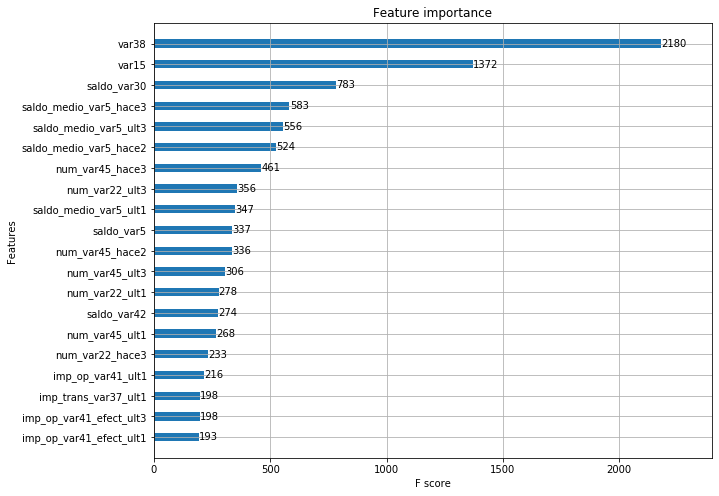

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### LightGBM 모델 학습 & 하이퍼 파라미터 튜닝

In [11]:
from lightgbm import LGBMClassifier
lgbm_clf=LGBMClassifier(n_estimators=500)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', 
            eval_set=evals, verbose=True)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score)) 

[1]	valid_0's auc: 0.806498	valid_0's binary_logloss: 0.162303
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81205	valid_0's binary_logloss: 0.15737
[3]	valid_0's auc: 0.815956	valid_0's binary_logloss: 0.154033
[4]	valid_0's auc: 0.816887	valid_0's binary_logloss: 0.151553
[5]	valid_0's auc: 0.819952	valid_0's binary_logloss: 0.149398
[6]	valid_0's auc: 0.821177	valid_0's binary_logloss: 0.14781
[7]	valid_0's auc: 0.821748	valid_0's binary_logloss: 0.146441
[8]	valid_0's auc: 0.821313	valid_0's binary_logloss: 0.145419
[9]	valid_0's auc: 0.822093	valid_0's binary_logloss: 0.144526
[10]	valid_0's auc: 0.822037	valid_0's binary_logloss: 0.143835
[11]	valid_0's auc: 0.82208	valid_0's binary_logloss: 0.14312
[12]	valid_0's auc: 0.822513	valid_0's binary_logloss: 0.142619
[13]	valid_0's auc: 0.823546	valid_0's binary_logloss: 0.142053
[14]	valid_0's auc: 0.826195	valid_0's binary_logloss: 0.141635
[15]	valid_0's auc: 0.826709	valid_0's binary_logloss: 0

[130]	valid_0's auc: 0.827455	valid_0's binary_logloss: 0.140565
[131]	valid_0's auc: 0.827149	valid_0's binary_logloss: 0.140642
[132]	valid_0's auc: 0.826944	valid_0's binary_logloss: 0.140715
[133]	valid_0's auc: 0.826998	valid_0's binary_logloss: 0.140721
[134]	valid_0's auc: 0.826734	valid_0's binary_logloss: 0.140779
[135]	valid_0's auc: 0.826457	valid_0's binary_logloss: 0.140861
[136]	valid_0's auc: 0.826494	valid_0's binary_logloss: 0.140861
[137]	valid_0's auc: 0.826316	valid_0's binary_logloss: 0.140916
[138]	valid_0's auc: 0.826112	valid_0's binary_logloss: 0.140986
[139]	valid_0's auc: 0.825917	valid_0's binary_logloss: 0.141028
[140]	valid_0's auc: 0.825736	valid_0's binary_logloss: 0.141096
[141]	valid_0's auc: 0.825565	valid_0's binary_logloss: 0.141151
[142]	valid_0's auc: 0.825469	valid_0's binary_logloss: 0.141189
[143]	valid_0's auc: 0.825711	valid_0's binary_logloss: 0.141186
[144]	valid_0's auc: 0.825532	valid_0's binary_logloss: 0.141257
[145]	valid_0's auc: 0.82

In [12]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
LGBM_clf=LGBMClassifier(n_estimators=200)

params={'num_leaves':[32,64], 'max_depth':[128,160], 'min_child_samples':[60,100], 'subsample':[0.8, 1]} 

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 cv 지정하지 않음
gridcv=GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', 
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score=roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score)) 

[1]	valid_0's auc: 0.828894	valid_0's binary_logloss: 0.156564	valid_1's auc: 0.808117	valid_1's binary_logloss: 0.162522
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.834825	valid_0's binary_logloss: 0.151094	valid_1's auc: 0.808566	valid_1's binary_logloss: 0.157615
[3]	valid_0's auc: 0.8421	valid_0's binary_logloss: 0.147094	valid_1's auc: 0.811176	valid_1's binary_logloss: 0.15432
[4]	valid_0's auc: 0.844519	valid_0's binary_logloss: 0.144015	valid_1's auc: 0.812732	valid_1's binary_logloss: 0.151648
[5]	valid_0's auc: 0.847644	valid_0's binary_logloss: 0.141527	valid_1's auc: 0.817401	valid_1's binary_logloss: 0.149602
[6]	valid_0's auc: 0.848567	valid_0's binary_logloss: 0.139446	valid_1's auc: 0.818772	valid_1's binary_logloss: 0.147807
[7]	valid_0's auc: 0.851601	valid_0's binary_logloss: 0.137672	valid_1's auc: 0.821925	valid_1's binary_logloss: 0.146411
[8]	valid_0's auc: 0.853212	valid_0's binary_logloss: 0.136162	valid_1's auc: 0.822908	v

[7]	valid_0's auc: 0.853396	valid_0's binary_logloss: 0.137826	valid_1's auc: 0.821924	valid_1's binary_logloss: 0.146383
[8]	valid_0's auc: 0.854792	valid_0's binary_logloss: 0.136275	valid_1's auc: 0.822647	valid_1's binary_logloss: 0.145238
[9]	valid_0's auc: 0.855931	valid_0's binary_logloss: 0.13495	valid_1's auc: 0.822234	valid_1's binary_logloss: 0.144356
[10]	valid_0's auc: 0.857146	valid_0's binary_logloss: 0.133825	valid_1's auc: 0.8237	valid_1's binary_logloss: 0.143509
[11]	valid_0's auc: 0.85853	valid_0's binary_logloss: 0.132845	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.142899
[12]	valid_0's auc: 0.859599	valid_0's binary_logloss: 0.131936	valid_1's auc: 0.823493	valid_1's binary_logloss: 0.142329
[13]	valid_0's auc: 0.860219	valid_0's binary_logloss: 0.131158	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.141847
[14]	valid_0's auc: 0.860921	valid_0's binary_logloss: 0.13044	valid_1's auc: 0.824531	valid_1's binary_logloss: 0.14145
[15]	valid_0's auc: 0.8624

[75]	valid_0's auc: 0.903754	valid_0's binary_logloss: 0.114013	valid_1's auc: 0.830506	valid_1's binary_logloss: 0.139238
Early stopping, best iteration is:
[45]	valid_0's auc: 0.890351	valid_0's binary_logloss: 0.119513	valid_1's auc: 0.832189	valid_1's binary_logloss: 0.138743
[1]	valid_0's auc: 0.831318	valid_0's binary_logloss: 0.156569	valid_1's auc: 0.809697	valid_1's binary_logloss: 0.16237
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.837441	valid_0's binary_logloss: 0.151172	valid_1's auc: 0.815064	valid_1's binary_logloss: 0.157419
[3]	valid_0's auc: 0.840412	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.816519	valid_1's binary_logloss: 0.154042
[4]	valid_0's auc: 0.842576	valid_0's binary_logloss: 0.144268	valid_1's auc: 0.816459	valid_1's binary_logloss: 0.15143
[5]	valid_0's auc: 0.846275	valid_0's binary_logloss: 0.141733	valid_1's auc: 0.819571	valid_1's binary_logloss: 0.149284
[6]	valid_0's auc: 0.84813	valid_0's binary_loglos

[1]	valid_0's auc: 0.825273	valid_0's binary_logloss: 0.156624	valid_1's auc: 0.805242	valid_1's binary_logloss: 0.162626
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831631	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.8072	valid_1's binary_logloss: 0.157893
[3]	valid_0's auc: 0.843575	valid_0's binary_logloss: 0.147161	valid_1's auc: 0.815524	valid_1's binary_logloss: 0.154514
[4]	valid_0's auc: 0.846457	valid_0's binary_logloss: 0.144102	valid_1's auc: 0.816844	valid_1's binary_logloss: 0.151837
[5]	valid_0's auc: 0.84828	valid_0's binary_logloss: 0.141606	valid_1's auc: 0.818979	valid_1's binary_logloss: 0.149795
[6]	valid_0's auc: 0.849577	valid_0's binary_logloss: 0.13955	valid_1's auc: 0.819484	valid_1's binary_logloss: 0.148185
[7]	valid_0's auc: 0.85127	valid_0's binary_logloss: 0.137803	valid_1's auc: 0.821542	valid_1's binary_logloss: 0.146711
[8]	valid_0's auc: 0.852399	valid_0's binary_logloss: 0.13634	valid_1's auc: 0.821772	vali

[1]	valid_0's auc: 0.830498	valid_0's binary_logloss: 0.156745	valid_1's auc: 0.80525	valid_1's binary_logloss: 0.16253
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.151248	valid_1's auc: 0.808572	valid_1's binary_logloss: 0.157631
[3]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.147228	valid_1's auc: 0.81466	valid_1's binary_logloss: 0.154137
[4]	valid_0's auc: 0.845871	valid_0's binary_logloss: 0.144184	valid_1's auc: 0.81663	valid_1's binary_logloss: 0.151528
[5]	valid_0's auc: 0.848348	valid_0's binary_logloss: 0.141727	valid_1's auc: 0.817172	valid_1's binary_logloss: 0.149532
[6]	valid_0's auc: 0.850914	valid_0's binary_logloss: 0.139632	valid_1's auc: 0.821344	valid_1's binary_logloss: 0.147734
[7]	valid_0's auc: 0.853396	valid_0's binary_logloss: 0.137826	valid_1's auc: 0.821924	valid_1's binary_logloss: 0.146383
[8]	valid_0's auc: 0.854792	valid_0's binary_logloss: 0.136275	valid_1's auc: 0.822647	va

[68]	valid_0's auc: 0.900854	valid_0's binary_logloss: 0.115177	valid_1's auc: 0.830764	valid_1's binary_logloss: 0.139167
[69]	valid_0's auc: 0.901267	valid_0's binary_logloss: 0.114978	valid_1's auc: 0.830541	valid_1's binary_logloss: 0.139229
[70]	valid_0's auc: 0.901332	valid_0's binary_logloss: 0.114901	valid_1's auc: 0.830461	valid_1's binary_logloss: 0.139212
[71]	valid_0's auc: 0.90179	valid_0's binary_logloss: 0.114739	valid_1's auc: 0.830607	valid_1's binary_logloss: 0.139222
[72]	valid_0's auc: 0.902513	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.83049	valid_1's binary_logloss: 0.139226
[73]	valid_0's auc: 0.902744	valid_0's binary_logloss: 0.114417	valid_1's auc: 0.83043	valid_1's binary_logloss: 0.139254
[74]	valid_0's auc: 0.903373	valid_0's binary_logloss: 0.114167	valid_1's auc: 0.83026	valid_1's binary_logloss: 0.139259
[75]	valid_0's auc: 0.903754	valid_0's binary_logloss: 0.114013	valid_1's auc: 0.830506	valid_1's binary_logloss: 0.139238
Early stopping, best

[59]	valid_0's auc: 0.894323	valid_0's binary_logloss: 0.117297	valid_1's auc: 0.829962	valid_1's binary_logloss: 0.139164
[60]	valid_0's auc: 0.894781	valid_0's binary_logloss: 0.117109	valid_1's auc: 0.830234	valid_1's binary_logloss: 0.139142
[61]	valid_0's auc: 0.895275	valid_0's binary_logloss: 0.116897	valid_1's auc: 0.830391	valid_1's binary_logloss: 0.13911
[62]	valid_0's auc: 0.895552	valid_0's binary_logloss: 0.116711	valid_1's auc: 0.83001	valid_1's binary_logloss: 0.139199
[63]	valid_0's auc: 0.895735	valid_0's binary_logloss: 0.11658	valid_1's auc: 0.829869	valid_1's binary_logloss: 0.139214
[64]	valid_0's auc: 0.896292	valid_0's binary_logloss: 0.116366	valid_1's auc: 0.830041	valid_1's binary_logloss: 0.139189
[65]	valid_0's auc: 0.896588	valid_0's binary_logloss: 0.116232	valid_1's auc: 0.830147	valid_1's binary_logloss: 0.139196
Early stopping, best iteration is:
[35]	valid_0's auc: 0.882527	valid_0's binary_logloss: 0.122222	valid_1's auc: 0.831959	valid_1's binary_lo

[61]	valid_0's auc: 0.895584	valid_0's binary_logloss: 0.117005	valid_1's auc: 0.829204	valid_1's binary_logloss: 0.139311
[62]	valid_0's auc: 0.895834	valid_0's binary_logloss: 0.11687	valid_1's auc: 0.82955	valid_1's binary_logloss: 0.139263
[63]	valid_0's auc: 0.896003	valid_0's binary_logloss: 0.116747	valid_1's auc: 0.829181	valid_1's binary_logloss: 0.139319
Early stopping, best iteration is:
[33]	valid_0's auc: 0.881289	valid_0's binary_logloss: 0.122659	valid_1's auc: 0.831009	valid_1's binary_logloss: 0.138995
[1]	valid_0's auc: 0.825273	valid_0's binary_logloss: 0.156624	valid_1's auc: 0.805242	valid_1's binary_logloss: 0.162626
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831631	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.8072	valid_1's binary_logloss: 0.157893
[3]	valid_0's auc: 0.843575	valid_0's binary_logloss: 0.147161	valid_1's auc: 0.815524	valid_1's binary_logloss: 0.154514
[4]	valid_0's auc: 0.846457	valid_0's binary_loglo

[64]	valid_0's auc: 0.896294	valid_0's binary_logloss: 0.116514	valid_1's auc: 0.832909	valid_1's binary_logloss: 0.139081
[65]	valid_0's auc: 0.896414	valid_0's binary_logloss: 0.116415	valid_1's auc: 0.832602	valid_1's binary_logloss: 0.139138
[66]	valid_0's auc: 0.896863	valid_0's binary_logloss: 0.116231	valid_1's auc: 0.832574	valid_1's binary_logloss: 0.139193
[67]	valid_0's auc: 0.897068	valid_0's binary_logloss: 0.116106	valid_1's auc: 0.832592	valid_1's binary_logloss: 0.139176
[68]	valid_0's auc: 0.897384	valid_0's binary_logloss: 0.115973	valid_1's auc: 0.832297	valid_1's binary_logloss: 0.139253
[69]	valid_0's auc: 0.897766	valid_0's binary_logloss: 0.11577	valid_1's auc: 0.832037	valid_1's binary_logloss: 0.139276
[70]	valid_0's auc: 0.898072	valid_0's binary_logloss: 0.115632	valid_1's auc: 0.831865	valid_1's binary_logloss: 0.139297
[71]	valid_0's auc: 0.898422	valid_0's binary_logloss: 0.11545	valid_1's auc: 0.83153	valid_1's binary_logloss: 0.13939
[72]	valid_0's auc: 

[8]	valid_0's auc: 0.866515	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.820579	valid_1's binary_logloss: 0.145747
[9]	valid_0's auc: 0.867941	valid_0's binary_logloss: 0.132201	valid_1's auc: 0.819981	valid_1's binary_logloss: 0.14477
[10]	valid_0's auc: 0.870301	valid_0's binary_logloss: 0.130863	valid_1's auc: 0.820534	valid_1's binary_logloss: 0.144099
[11]	valid_0's auc: 0.872231	valid_0's binary_logloss: 0.129628	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.143412
[12]	valid_0's auc: 0.874022	valid_0's binary_logloss: 0.128502	valid_1's auc: 0.821813	valid_1's binary_logloss: 0.142793
[13]	valid_0's auc: 0.87536	valid_0's binary_logloss: 0.127501	valid_1's auc: 0.821936	valid_1's binary_logloss: 0.142446
[14]	valid_0's auc: 0.87715	valid_0's binary_logloss: 0.126594	valid_1's auc: 0.822516	valid_1's binary_logloss: 0.142056
[15]	valid_0's auc: 0.878535	valid_0's binary_logloss: 0.12575	valid_1's auc: 0.823812	valid_1's binary_logloss: 0.141641
[16]	valid_0's auc: 0.

[15]	valid_0's auc: 0.878229	valid_0's binary_logloss: 0.125756	valid_1's auc: 0.825158	valid_1's binary_logloss: 0.141088
[16]	valid_0's auc: 0.879956	valid_0's binary_logloss: 0.124967	valid_1's auc: 0.825818	valid_1's binary_logloss: 0.140831
[17]	valid_0's auc: 0.881664	valid_0's binary_logloss: 0.124221	valid_1's auc: 0.826732	valid_1's binary_logloss: 0.140487
[18]	valid_0's auc: 0.883335	valid_0's binary_logloss: 0.123474	valid_1's auc: 0.828089	valid_1's binary_logloss: 0.140264
[19]	valid_0's auc: 0.885095	valid_0's binary_logloss: 0.122769	valid_1's auc: 0.827717	valid_1's binary_logloss: 0.140168
[20]	valid_0's auc: 0.886423	valid_0's binary_logloss: 0.122049	valid_1's auc: 0.827869	valid_1's binary_logloss: 0.140077
[21]	valid_0's auc: 0.887912	valid_0's binary_logloss: 0.121446	valid_1's auc: 0.82857	valid_1's binary_logloss: 0.139911
[22]	valid_0's auc: 0.888862	valid_0's binary_logloss: 0.120879	valid_1's auc: 0.827944	valid_1's binary_logloss: 0.139913
[23]	valid_0's au

[31]	valid_0's auc: 0.899184	valid_0's binary_logloss: 0.116545	valid_1's auc: 0.829841	valid_1's binary_logloss: 0.139257
[32]	valid_0's auc: 0.899889	valid_0's binary_logloss: 0.116161	valid_1's auc: 0.829927	valid_1's binary_logloss: 0.139273
[33]	valid_0's auc: 0.900633	valid_0's binary_logloss: 0.115803	valid_1's auc: 0.829474	valid_1's binary_logloss: 0.139345
[34]	valid_0's auc: 0.901874	valid_0's binary_logloss: 0.115405	valid_1's auc: 0.830267	valid_1's binary_logloss: 0.139148
[35]	valid_0's auc: 0.902921	valid_0's binary_logloss: 0.115008	valid_1's auc: 0.830052	valid_1's binary_logloss: 0.139222
[36]	valid_0's auc: 0.904063	valid_0's binary_logloss: 0.114591	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.139313
[37]	valid_0's auc: 0.905116	valid_0's binary_logloss: 0.114173	valid_1's auc: 0.829984	valid_1's binary_logloss: 0.139287
[38]	valid_0's auc: 0.906266	valid_0's binary_logloss: 0.113763	valid_1's auc: 0.829675	valid_1's binary_logloss: 0.139319
[39]	valid_0's a

[34]	valid_0's auc: 0.901815	valid_0's binary_logloss: 0.115131	valid_1's auc: 0.831791	valid_1's binary_logloss: 0.139202
[35]	valid_0's auc: 0.902659	valid_0's binary_logloss: 0.114736	valid_1's auc: 0.832178	valid_1's binary_logloss: 0.139168
[36]	valid_0's auc: 0.903651	valid_0's binary_logloss: 0.114282	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.13921
[37]	valid_0's auc: 0.904802	valid_0's binary_logloss: 0.113855	valid_1's auc: 0.831622	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.905742	valid_0's binary_logloss: 0.113454	valid_1's auc: 0.831011	valid_1's binary_logloss: 0.139395
[39]	valid_0's auc: 0.906553	valid_0's binary_logloss: 0.113068	valid_1's auc: 0.830575	valid_1's binary_logloss: 0.139514
[40]	valid_0's auc: 0.907307	valid_0's binary_logloss: 0.112683	valid_1's auc: 0.830134	valid_1's binary_logloss: 0.139576
[41]	valid_0's auc: 0.908106	valid_0's binary_logloss: 0.112293	valid_1's auc: 0.830194	valid_1's binary_logloss: 0.139565
[42]	valid_0's au

[40]	valid_0's auc: 0.90723	valid_0's binary_logloss: 0.112745	valid_1's auc: 0.829222	valid_1's binary_logloss: 0.139785
[41]	valid_0's auc: 0.908161	valid_0's binary_logloss: 0.112331	valid_1's auc: 0.829151	valid_1's binary_logloss: 0.139838
[42]	valid_0's auc: 0.908781	valid_0's binary_logloss: 0.111966	valid_1's auc: 0.829084	valid_1's binary_logloss: 0.139877
[43]	valid_0's auc: 0.909309	valid_0's binary_logloss: 0.11166	valid_1's auc: 0.829294	valid_1's binary_logloss: 0.139868
[44]	valid_0's auc: 0.909753	valid_0's binary_logloss: 0.111373	valid_1's auc: 0.829126	valid_1's binary_logloss: 0.13994
[45]	valid_0's auc: 0.910438	valid_0's binary_logloss: 0.111101	valid_1's auc: 0.828581	valid_1's binary_logloss: 0.14008
[46]	valid_0's auc: 0.910704	valid_0's binary_logloss: 0.110845	valid_1's auc: 0.828674	valid_1's binary_logloss: 0.140104
[47]	valid_0's auc: 0.911277	valid_0's binary_logloss: 0.11051	valid_1's auc: 0.828452	valid_1's binary_logloss: 0.140172
[48]	valid_0's auc: 0

[58]	valid_0's auc: 0.919131	valid_0's binary_logloss: 0.107307	valid_1's auc: 0.823185	valid_1's binary_logloss: 0.141673
[59]	valid_0's auc: 0.919919	valid_0's binary_logloss: 0.107053	valid_1's auc: 0.823186	valid_1's binary_logloss: 0.141721
[60]	valid_0's auc: 0.920356	valid_0's binary_logloss: 0.106822	valid_1's auc: 0.823028	valid_1's binary_logloss: 0.141789
Early stopping, best iteration is:
[30]	valid_0's auc: 0.899641	valid_0's binary_logloss: 0.116725	valid_1's auc: 0.82858	valid_1's binary_logloss: 0.140054
[1]	valid_0's auc: 0.838875	valid_0's binary_logloss: 0.155742	valid_1's auc: 0.803726	valid_1's binary_logloss: 0.162147
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845834	valid_0's binary_logloss: 0.149922	valid_1's auc: 0.8126	valid_1's binary_logloss: 0.15729
[3]	valid_0's auc: 0.850564	valid_0's binary_logloss: 0.145619	valid_1's auc: 0.814263	valid_1's binary_logloss: 0.153942
[4]	valid_0's auc: 0.854558	valid_0's binary_loglo

[13]	valid_0's auc: 0.873365	valid_0's binary_logloss: 0.127629	valid_1's auc: 0.825035	valid_1's binary_logloss: 0.141835
[14]	valid_0's auc: 0.875223	valid_0's binary_logloss: 0.126695	valid_1's auc: 0.82624	valid_1's binary_logloss: 0.141349
[15]	valid_0's auc: 0.876568	valid_0's binary_logloss: 0.125857	valid_1's auc: 0.826407	valid_1's binary_logloss: 0.140979
[16]	valid_0's auc: 0.878435	valid_0's binary_logloss: 0.125042	valid_1's auc: 0.827319	valid_1's binary_logloss: 0.140556
[17]	valid_0's auc: 0.880296	valid_0's binary_logloss: 0.124251	valid_1's auc: 0.826581	valid_1's binary_logloss: 0.140465
[18]	valid_0's auc: 0.881966	valid_0's binary_logloss: 0.123547	valid_1's auc: 0.827051	valid_1's binary_logloss: 0.140289
[19]	valid_0's auc: 0.883753	valid_0's binary_logloss: 0.122865	valid_1's auc: 0.828208	valid_1's binary_logloss: 0.140054
[20]	valid_0's auc: 0.885868	valid_0's binary_logloss: 0.122209	valid_1's auc: 0.827819	valid_1's binary_logloss: 0.139966
[21]	valid_0's au

[18]	valid_0's auc: 0.881172	valid_0's binary_logloss: 0.123561	valid_1's auc: 0.827754	valid_1's binary_logloss: 0.140448
[19]	valid_0's auc: 0.883424	valid_0's binary_logloss: 0.122881	valid_1's auc: 0.827014	valid_1's binary_logloss: 0.140367
[20]	valid_0's auc: 0.885268	valid_0's binary_logloss: 0.122163	valid_1's auc: 0.827045	valid_1's binary_logloss: 0.140284
[21]	valid_0's auc: 0.886828	valid_0's binary_logloss: 0.121575	valid_1's auc: 0.827487	valid_1's binary_logloss: 0.140183
[22]	valid_0's auc: 0.887889	valid_0's binary_logloss: 0.120986	valid_1's auc: 0.827768	valid_1's binary_logloss: 0.14004
[23]	valid_0's auc: 0.889677	valid_0's binary_logloss: 0.120316	valid_1's auc: 0.827446	valid_1's binary_logloss: 0.14
[24]	valid_0's auc: 0.891217	valid_0's binary_logloss: 0.119737	valid_1's auc: 0.829021	valid_1's binary_logloss: 0.139817
[25]	valid_0's auc: 0.892319	valid_0's binary_logloss: 0.119193	valid_1's auc: 0.829181	valid_1's binary_logloss: 0.139691
[26]	valid_0's auc: 0

[22]	valid_0's auc: 0.869284	valid_0's binary_logloss: 0.12701	valid_1's auc: 0.829622	valid_1's binary_logloss: 0.139757
[23]	valid_0's auc: 0.869897	valid_0's binary_logloss: 0.126648	valid_1's auc: 0.830074	valid_1's binary_logloss: 0.139599
[24]	valid_0's auc: 0.870872	valid_0's binary_logloss: 0.126288	valid_1's auc: 0.831038	valid_1's binary_logloss: 0.139438
[25]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125953	valid_1's auc: 0.831298	valid_1's binary_logloss: 0.139383
[26]	valid_0's auc: 0.872335	valid_0's binary_logloss: 0.125626	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.139311
[27]	valid_0's auc: 0.873006	valid_0's binary_logloss: 0.125335	valid_1's auc: 0.831804	valid_1's binary_logloss: 0.139288
[28]	valid_0's auc: 0.873717	valid_0's binary_logloss: 0.125037	valid_1's auc: 0.831862	valid_1's binary_logloss: 0.139254
[29]	valid_0's auc: 0.874329	valid_0's binary_logloss: 0.12476	valid_1's auc: 0.83198	valid_1's binary_logloss: 0.139202
[30]	valid_0's auc: 

[32]	valid_0's auc: 0.878345	valid_0's binary_logloss: 0.123904	valid_1's auc: 0.831916	valid_1's binary_logloss: 0.138893
[33]	valid_0's auc: 0.879412	valid_0's binary_logloss: 0.123632	valid_1's auc: 0.832241	valid_1's binary_logloss: 0.138842
[34]	valid_0's auc: 0.879991	valid_0's binary_logloss: 0.123381	valid_1's auc: 0.833192	valid_1's binary_logloss: 0.138714
[35]	valid_0's auc: 0.880873	valid_0's binary_logloss: 0.123097	valid_1's auc: 0.833103	valid_1's binary_logloss: 0.138736
[36]	valid_0's auc: 0.881704	valid_0's binary_logloss: 0.12285	valid_1's auc: 0.833085	valid_1's binary_logloss: 0.138729
[37]	valid_0's auc: 0.882273	valid_0's binary_logloss: 0.122616	valid_1's auc: 0.832844	valid_1's binary_logloss: 0.138789
[38]	valid_0's auc: 0.88296	valid_0's binary_logloss: 0.122365	valid_1's auc: 0.832596	valid_1's binary_logloss: 0.138848
[39]	valid_0's auc: 0.883875	valid_0's binary_logloss: 0.122141	valid_1's auc: 0.832318	valid_1's binary_logloss: 0.138878
[40]	valid_0's auc

[36]	valid_0's auc: 0.880706	valid_0's binary_logloss: 0.12296	valid_1's auc: 0.831746	valid_1's binary_logloss: 0.138558
[37]	valid_0's auc: 0.881391	valid_0's binary_logloss: 0.122714	valid_1's auc: 0.832388	valid_1's binary_logloss: 0.138451
[38]	valid_0's auc: 0.881879	valid_0's binary_logloss: 0.122476	valid_1's auc: 0.832226	valid_1's binary_logloss: 0.138441
[39]	valid_0's auc: 0.882578	valid_0's binary_logloss: 0.122253	valid_1's auc: 0.832481	valid_1's binary_logloss: 0.138418
[40]	valid_0's auc: 0.883162	valid_0's binary_logloss: 0.122029	valid_1's auc: 0.832314	valid_1's binary_logloss: 0.138441
[41]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.83213	valid_1's binary_logloss: 0.138522
[42]	valid_0's auc: 0.884203	valid_0's binary_logloss: 0.121592	valid_1's auc: 0.832076	valid_1's binary_logloss: 0.138556
[43]	valid_0's auc: 0.884566	valid_0's binary_logloss: 0.121426	valid_1's auc: 0.831738	valid_1's binary_logloss: 0.13863
[44]	valid_0's auc:

[44]	valid_0's auc: 0.886373	valid_0's binary_logloss: 0.121163	valid_1's auc: 0.830006	valid_1's binary_logloss: 0.139102
[45]	valid_0's auc: 0.886921	valid_0's binary_logloss: 0.12095	valid_1's auc: 0.830346	valid_1's binary_logloss: 0.139051
[46]	valid_0's auc: 0.887645	valid_0's binary_logloss: 0.12075	valid_1's auc: 0.830398	valid_1's binary_logloss: 0.13903
[47]	valid_0's auc: 0.88816	valid_0's binary_logloss: 0.120543	valid_1's auc: 0.829957	valid_1's binary_logloss: 0.13909
[48]	valid_0's auc: 0.888665	valid_0's binary_logloss: 0.120342	valid_1's auc: 0.829373	valid_1's binary_logloss: 0.139192
[49]	valid_0's auc: 0.88935	valid_0's binary_logloss: 0.120098	valid_1's auc: 0.829292	valid_1's binary_logloss: 0.13924
[50]	valid_0's auc: 0.889688	valid_0's binary_logloss: 0.119923	valid_1's auc: 0.829309	valid_1's binary_logloss: 0.139249
[51]	valid_0's auc: 0.890228	valid_0's binary_logloss: 0.119741	valid_1's auc: 0.829357	valid_1's binary_logloss: 0.13922
[52]	valid_0's auc: 0.89

[45]	valid_0's auc: 0.886008	valid_0's binary_logloss: 0.12087	valid_1's auc: 0.834086	valid_1's binary_logloss: 0.138531
[46]	valid_0's auc: 0.886681	valid_0's binary_logloss: 0.120671	valid_1's auc: 0.833982	valid_1's binary_logloss: 0.138545
[47]	valid_0's auc: 0.887101	valid_0's binary_logloss: 0.120487	valid_1's auc: 0.834107	valid_1's binary_logloss: 0.138552
[48]	valid_0's auc: 0.887518	valid_0's binary_logloss: 0.120289	valid_1's auc: 0.83394	valid_1's binary_logloss: 0.138573
[49]	valid_0's auc: 0.887878	valid_0's binary_logloss: 0.120141	valid_1's auc: 0.833962	valid_1's binary_logloss: 0.138611
[50]	valid_0's auc: 0.888379	valid_0's binary_logloss: 0.119939	valid_1's auc: 0.833918	valid_1's binary_logloss: 0.138624
[51]	valid_0's auc: 0.888858	valid_0's binary_logloss: 0.119717	valid_1's auc: 0.833762	valid_1's binary_logloss: 0.138699
[52]	valid_0's auc: 0.889439	valid_0's binary_logloss: 0.119495	valid_1's auc: 0.833269	valid_1's binary_logloss: 0.138792
[53]	valid_0's auc

[46]	valid_0's auc: 0.88618	valid_0's binary_logloss: 0.120611	valid_1's auc: 0.830399	valid_1's binary_logloss: 0.139569
[47]	valid_0's auc: 0.886771	valid_0's binary_logloss: 0.120395	valid_1's auc: 0.830037	valid_1's binary_logloss: 0.139642
[48]	valid_0's auc: 0.887286	valid_0's binary_logloss: 0.120199	valid_1's auc: 0.830103	valid_1's binary_logloss: 0.139638
[49]	valid_0's auc: 0.887756	valid_0's binary_logloss: 0.119997	valid_1's auc: 0.830542	valid_1's binary_logloss: 0.139583
[50]	valid_0's auc: 0.888127	valid_0's binary_logloss: 0.119828	valid_1's auc: 0.830457	valid_1's binary_logloss: 0.139612
[51]	valid_0's auc: 0.888407	valid_0's binary_logloss: 0.119704	valid_1's auc: 0.830453	valid_1's binary_logloss: 0.139612
[52]	valid_0's auc: 0.888876	valid_0's binary_logloss: 0.119516	valid_1's auc: 0.830455	valid_1's binary_logloss: 0.139649
[53]	valid_0's auc: 0.889204	valid_0's binary_logloss: 0.119363	valid_1's auc: 0.830473	valid_1's binary_logloss: 0.139648
[54]	valid_0's au

[57]	valid_0's auc: 0.893098	valid_0's binary_logloss: 0.118544	valid_1's auc: 0.831518	valid_1's binary_logloss: 0.139277
[58]	valid_0's auc: 0.89388	valid_0's binary_logloss: 0.118369	valid_1's auc: 0.831354	valid_1's binary_logloss: 0.139286
[59]	valid_0's auc: 0.894285	valid_0's binary_logloss: 0.118214	valid_1's auc: 0.831534	valid_1's binary_logloss: 0.13926
[60]	valid_0's auc: 0.894957	valid_0's binary_logloss: 0.117953	valid_1's auc: 0.831201	valid_1's binary_logloss: 0.139307
[61]	valid_0's auc: 0.895265	valid_0's binary_logloss: 0.117786	valid_1's auc: 0.83083	valid_1's binary_logloss: 0.13938
[62]	valid_0's auc: 0.895526	valid_0's binary_logloss: 0.117661	valid_1's auc: 0.83072	valid_1's binary_logloss: 0.139419
[63]	valid_0's auc: 0.896116	valid_0's binary_logloss: 0.117441	valid_1's auc: 0.830734	valid_1's binary_logloss: 0.139444
[64]	valid_0's auc: 0.896753	valid_0's binary_logloss: 0.117256	valid_1's auc: 0.830427	valid_1's binary_logloss: 0.139514
Early stopping, best 

[63]	valid_0's auc: 0.895647	valid_0's binary_logloss: 0.117669	valid_1's auc: 0.829774	valid_1's binary_logloss: 0.139115
[64]	valid_0's auc: 0.89586	valid_0's binary_logloss: 0.117531	valid_1's auc: 0.829594	valid_1's binary_logloss: 0.139199
[65]	valid_0's auc: 0.896103	valid_0's binary_logloss: 0.117393	valid_1's auc: 0.829512	valid_1's binary_logloss: 0.139222
[66]	valid_0's auc: 0.896393	valid_0's binary_logloss: 0.117219	valid_1's auc: 0.829545	valid_1's binary_logloss: 0.139227
[67]	valid_0's auc: 0.896898	valid_0's binary_logloss: 0.117067	valid_1's auc: 0.829601	valid_1's binary_logloss: 0.139223
[68]	valid_0's auc: 0.897378	valid_0's binary_logloss: 0.116887	valid_1's auc: 0.82959	valid_1's binary_logloss: 0.139252
[69]	valid_0's auc: 0.897702	valid_0's binary_logloss: 0.116725	valid_1's auc: 0.829323	valid_1's binary_logloss: 0.139323
Early stopping, best iteration is:
[39]	valid_0's auc: 0.883495	valid_0's binary_logloss: 0.122247	valid_1's auc: 0.831007	valid_1's binary_l

[60]	valid_0's auc: 0.892904	valid_0's binary_logloss: 0.118113	valid_1's auc: 0.832247	valid_1's binary_logloss: 0.138949
[61]	valid_0's auc: 0.893312	valid_0's binary_logloss: 0.117937	valid_1's auc: 0.832426	valid_1's binary_logloss: 0.138911
[62]	valid_0's auc: 0.893739	valid_0's binary_logloss: 0.117773	valid_1's auc: 0.832651	valid_1's binary_logloss: 0.13888
[63]	valid_0's auc: 0.89423	valid_0's binary_logloss: 0.117582	valid_1's auc: 0.832137	valid_1's binary_logloss: 0.138984
[64]	valid_0's auc: 0.894617	valid_0's binary_logloss: 0.117386	valid_1's auc: 0.831976	valid_1's binary_logloss: 0.139013
[65]	valid_0's auc: 0.895024	valid_0's binary_logloss: 0.117196	valid_1's auc: 0.83198	valid_1's binary_logloss: 0.139047
[66]	valid_0's auc: 0.895633	valid_0's binary_logloss: 0.116985	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.138996
Early stopping, best iteration is:
[36]	valid_0's auc: 0.880562	valid_0's binary_logloss: 0.122831	valid_1's auc: 0.835153	valid_1's binary_lo

[1]	valid_0's auc: 0.840069	valid_0's binary_logloss: 0.156345	valid_1's auc: 0.803908	valid_1's binary_logloss: 0.162476
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845833	valid_0's binary_logloss: 0.150559	valid_1's auc: 0.805819	valid_1's binary_logloss: 0.157548
[3]	valid_0's auc: 0.850124	valid_0's binary_logloss: 0.146403	valid_1's auc: 0.813117	valid_1's binary_logloss: 0.154006
[4]	valid_0's auc: 0.855095	valid_0's binary_logloss: 0.143082	valid_1's auc: 0.814758	valid_1's binary_logloss: 0.151424
[5]	valid_0's auc: 0.85765	valid_0's binary_logloss: 0.140418	valid_1's auc: 0.817455	valid_1's binary_logloss: 0.149354
[6]	valid_0's auc: 0.860199	valid_0's binary_logloss: 0.138159	valid_1's auc: 0.819651	valid_1's binary_logloss: 0.1476
[7]	valid_0's auc: 0.862423	valid_0's binary_logloss: 0.136188	valid_1's auc: 0.819787	valid_1's binary_logloss: 0.146312
[8]	valid_0's auc: 0.864284	valid_0's binary_logloss: 0.134573	valid_1's auc: 0.819873	v

[7]	valid_0's auc: 0.863328	valid_0's binary_logloss: 0.136031	valid_1's auc: 0.827939	valid_1's binary_logloss: 0.145437
[8]	valid_0's auc: 0.864719	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.828864	valid_1's binary_logloss: 0.144274
[9]	valid_0's auc: 0.867526	valid_0's binary_logloss: 0.132942	valid_1's auc: 0.827895	valid_1's binary_logloss: 0.143468
[10]	valid_0's auc: 0.869402	valid_0's binary_logloss: 0.131643	valid_1's auc: 0.828565	valid_1's binary_logloss: 0.142637
[11]	valid_0's auc: 0.871117	valid_0's binary_logloss: 0.130498	valid_1's auc: 0.829123	valid_1's binary_logloss: 0.141969
[12]	valid_0's auc: 0.872284	valid_0's binary_logloss: 0.129491	valid_1's auc: 0.829454	valid_1's binary_logloss: 0.141423
[13]	valid_0's auc: 0.87348	valid_0's binary_logloss: 0.128512	valid_1's auc: 0.830024	valid_1's binary_logloss: 0.140914
[14]	valid_0's auc: 0.874985	valid_0's binary_logloss: 0.127648	valid_1's auc: 0.829323	valid_1's binary_logloss: 0.140588
[15]	valid_0's auc: 

[20]	valid_0's auc: 0.882787	valid_0's binary_logloss: 0.123705	valid_1's auc: 0.828662	valid_1's binary_logloss: 0.139788
[21]	valid_0's auc: 0.884323	valid_0's binary_logloss: 0.123108	valid_1's auc: 0.828554	valid_1's binary_logloss: 0.139791
[22]	valid_0's auc: 0.885821	valid_0's binary_logloss: 0.12251	valid_1's auc: 0.828965	valid_1's binary_logloss: 0.139661
[23]	valid_0's auc: 0.887077	valid_0's binary_logloss: 0.121973	valid_1's auc: 0.827951	valid_1's binary_logloss: 0.139735
[24]	valid_0's auc: 0.888051	valid_0's binary_logloss: 0.121474	valid_1's auc: 0.827738	valid_1's binary_logloss: 0.139743
[25]	valid_0's auc: 0.889473	valid_0's binary_logloss: 0.120922	valid_1's auc: 0.828406	valid_1's binary_logloss: 0.139642
[26]	valid_0's auc: 0.89044	valid_0's binary_logloss: 0.12041	valid_1's auc: 0.828355	valid_1's binary_logloss: 0.139601
[27]	valid_0's auc: 0.891357	valid_0's binary_logloss: 0.119916	valid_1's auc: 0.828081	valid_1's binary_logloss: 0.139638
[28]	valid_0's auc:

[48]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.111785	valid_1's auc: 0.826738	valid_1's binary_logloss: 0.140673
[49]	valid_0's auc: 0.910131	valid_0's binary_logloss: 0.111549	valid_1's auc: 0.826602	valid_1's binary_logloss: 0.14072
[50]	valid_0's auc: 0.910595	valid_0's binary_logloss: 0.111265	valid_1's auc: 0.826619	valid_1's binary_logloss: 0.140765
[51]	valid_0's auc: 0.910991	valid_0's binary_logloss: 0.11098	valid_1's auc: 0.826066	valid_1's binary_logloss: 0.140912
[52]	valid_0's auc: 0.911535	valid_0's binary_logloss: 0.110721	valid_1's auc: 0.8261	valid_1's binary_logloss: 0.140951
[53]	valid_0's auc: 0.911945	valid_0's binary_logloss: 0.110483	valid_1's auc: 0.826054	valid_1's binary_logloss: 0.141
[54]	valid_0's auc: 0.912336	valid_0's binary_logloss: 0.110234	valid_1's auc: 0.825794	valid_1's binary_logloss: 0.141109
[55]	valid_0's auc: 0.91281	valid_0's binary_logloss: 0.109987	valid_1's auc: 0.825678	valid_1's binary_logloss: 0.141192
[56]	valid_0's auc: 0.91

[58]	valid_0's auc: 0.916883	valid_0's binary_logloss: 0.109038	valid_1's auc: 0.825132	valid_1's binary_logloss: 0.140942
[59]	valid_0's auc: 0.917566	valid_0's binary_logloss: 0.108718	valid_1's auc: 0.824605	valid_1's binary_logloss: 0.141049
Early stopping, best iteration is:
[29]	valid_0's auc: 0.89649	valid_0's binary_logloss: 0.118606	valid_1's auc: 0.828854	valid_1's binary_logloss: 0.139709
[1]	valid_0's auc: 0.838214	valid_0's binary_logloss: 0.156001	valid_1's auc: 0.807659	valid_1's binary_logloss: 0.162102
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.847118	valid_0's binary_logloss: 0.150261	valid_1's auc: 0.813477	valid_1's binary_logloss: 0.157208
[3]	valid_0's auc: 0.853363	valid_0's binary_logloss: 0.146121	valid_1's auc: 0.819075	valid_1's binary_logloss: 0.153639
[4]	valid_0's auc: 0.855246	valid_0's binary_logloss: 0.14289	valid_1's auc: 0.82225	valid_1's binary_logloss: 0.150939
[5]	valid_0's auc: 0.857766	valid_0's binary_loglo

[13]	valid_0's auc: 0.873902	valid_0's binary_logloss: 0.128807	valid_1's auc: 0.827177	valid_1's binary_logloss: 0.141575
[14]	valid_0's auc: 0.87505	valid_0's binary_logloss: 0.127894	valid_1's auc: 0.82785	valid_1's binary_logloss: 0.141126
[15]	valid_0's auc: 0.876141	valid_0's binary_logloss: 0.127143	valid_1's auc: 0.827626	valid_1's binary_logloss: 0.140833
[16]	valid_0's auc: 0.877348	valid_0's binary_logloss: 0.126407	valid_1's auc: 0.828243	valid_1's binary_logloss: 0.140456
[17]	valid_0's auc: 0.878611	valid_0's binary_logloss: 0.125652	valid_1's auc: 0.82924	valid_1's binary_logloss: 0.140069
[18]	valid_0's auc: 0.880178	valid_0's binary_logloss: 0.124955	valid_1's auc: 0.829633	valid_1's binary_logloss: 0.139857
[19]	valid_0's auc: 0.881384	valid_0's binary_logloss: 0.124328	valid_1's auc: 0.829233	valid_1's binary_logloss: 0.139773
[20]	valid_0's auc: 0.882787	valid_0's binary_logloss: 0.123705	valid_1's auc: 0.828662	valid_1's binary_logloss: 0.139788
[21]	valid_0's auc:

[34]	valid_0's auc: 0.898738	valid_0's binary_logloss: 0.116919	valid_1's auc: 0.828938	valid_1's binary_logloss: 0.139728
[35]	valid_0's auc: 0.899806	valid_0's binary_logloss: 0.116553	valid_1's auc: 0.828753	valid_1's binary_logloss: 0.139784
[36]	valid_0's auc: 0.900688	valid_0's binary_logloss: 0.116177	valid_1's auc: 0.829024	valid_1's binary_logloss: 0.139723
[37]	valid_0's auc: 0.901744	valid_0's binary_logloss: 0.115784	valid_1's auc: 0.828534	valid_1's binary_logloss: 0.13981
[38]	valid_0's auc: 0.902584	valid_0's binary_logloss: 0.11543	valid_1's auc: 0.82838	valid_1's binary_logloss: 0.139861
[39]	valid_0's auc: 0.903426	valid_0's binary_logloss: 0.115042	valid_1's auc: 0.828259	valid_1's binary_logloss: 0.139881
[40]	valid_0's auc: 0.904036	valid_0's binary_logloss: 0.114731	valid_1's auc: 0.82811	valid_1's binary_logloss: 0.13994
[41]	valid_0's auc: 0.905344	valid_0's binary_logloss: 0.1143	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.139967
[42]	valid_0's auc: 0.9

[44]	valid_0's auc: 0.888612	valid_0's binary_logloss: 0.119936	valid_1's auc: 0.833019	valid_1's binary_logloss: 0.138938
[45]	valid_0's auc: 0.889237	valid_0's binary_logloss: 0.119715	valid_1's auc: 0.833374	valid_1's binary_logloss: 0.138852
[46]	valid_0's auc: 0.889846	valid_0's binary_logloss: 0.119476	valid_1's auc: 0.833039	valid_1's binary_logloss: 0.138931
[47]	valid_0's auc: 0.890346	valid_0's binary_logloss: 0.119293	valid_1's auc: 0.832614	valid_1's binary_logloss: 0.13901
[48]	valid_0's auc: 0.890806	valid_0's binary_logloss: 0.119091	valid_1's auc: 0.832432	valid_1's binary_logloss: 0.139057
[49]	valid_0's auc: 0.891404	valid_0's binary_logloss: 0.118871	valid_1's auc: 0.832244	valid_1's binary_logloss: 0.139074
[50]	valid_0's auc: 0.891766	valid_0's binary_logloss: 0.118702	valid_1's auc: 0.832236	valid_1's binary_logloss: 0.139093
[51]	valid_0's auc: 0.892196	valid_0's binary_logloss: 0.118516	valid_1's auc: 0.832343	valid_1's binary_logloss: 0.139073
[52]	valid_0's au

[48]	valid_0's auc: 0.891779	valid_0's binary_logloss: 0.11894	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.138884
[49]	valid_0's auc: 0.892167	valid_0's binary_logloss: 0.118744	valid_1's auc: 0.831395	valid_1's binary_logloss: 0.13889
[50]	valid_0's auc: 0.89252	valid_0's binary_logloss: 0.118589	valid_1's auc: 0.831488	valid_1's binary_logloss: 0.138874
[51]	valid_0's auc: 0.892867	valid_0's binary_logloss: 0.118403	valid_1's auc: 0.831259	valid_1's binary_logloss: 0.138933
[52]	valid_0's auc: 0.893628	valid_0's binary_logloss: 0.118145	valid_1's auc: 0.830595	valid_1's binary_logloss: 0.139029
[53]	valid_0's auc: 0.893825	valid_0's binary_logloss: 0.118021	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.139058
[54]	valid_0's auc: 0.894468	valid_0's binary_logloss: 0.117826	valid_1's auc: 0.830348	valid_1's binary_logloss: 0.139064
[55]	valid_0's auc: 0.89522	valid_0's binary_logloss: 0.117605	valid_1's auc: 0.830744	valid_1's binary_logloss: 0.139014
[56]	valid_0's auc: 

[43]	valid_0's auc: 0.887319	valid_0's binary_logloss: 0.120342	valid_1's auc: 0.831847	valid_1's binary_logloss: 0.138688
[44]	valid_0's auc: 0.888076	valid_0's binary_logloss: 0.120091	valid_1's auc: 0.831691	valid_1's binary_logloss: 0.138727
[45]	valid_0's auc: 0.888546	valid_0's binary_logloss: 0.119924	valid_1's auc: 0.831344	valid_1's binary_logloss: 0.138786
[46]	valid_0's auc: 0.889109	valid_0's binary_logloss: 0.119696	valid_1's auc: 0.831502	valid_1's binary_logloss: 0.138775
[47]	valid_0's auc: 0.889454	valid_0's binary_logloss: 0.119526	valid_1's auc: 0.83139	valid_1's binary_logloss: 0.138782
[48]	valid_0's auc: 0.889986	valid_0's binary_logloss: 0.119342	valid_1's auc: 0.831261	valid_1's binary_logloss: 0.13883
[49]	valid_0's auc: 0.890666	valid_0's binary_logloss: 0.119086	valid_1's auc: 0.830774	valid_1's binary_logloss: 0.138895
[50]	valid_0's auc: 0.890985	valid_0's binary_logloss: 0.118902	valid_1's auc: 0.830795	valid_1's binary_logloss: 0.138874
[51]	valid_0's auc

[44]	valid_0's auc: 0.888142	valid_0's binary_logloss: 0.119972	valid_1's auc: 0.829999	valid_1's binary_logloss: 0.139122
[45]	valid_0's auc: 0.888637	valid_0's binary_logloss: 0.119785	valid_1's auc: 0.829967	valid_1's binary_logloss: 0.1391
[46]	valid_0's auc: 0.889039	valid_0's binary_logloss: 0.119596	valid_1's auc: 0.829789	valid_1's binary_logloss: 0.139114
[47]	valid_0's auc: 0.889864	valid_0's binary_logloss: 0.119399	valid_1's auc: 0.829822	valid_1's binary_logloss: 0.139117
[48]	valid_0's auc: 0.890192	valid_0's binary_logloss: 0.119249	valid_1's auc: 0.829651	valid_1's binary_logloss: 0.139208
[49]	valid_0's auc: 0.890468	valid_0's binary_logloss: 0.119111	valid_1's auc: 0.829372	valid_1's binary_logloss: 0.13926
[50]	valid_0's auc: 0.890802	valid_0's binary_logloss: 0.118905	valid_1's auc: 0.829478	valid_1's binary_logloss: 0.139284
[51]	valid_0's auc: 0.891212	valid_0's binary_logloss: 0.118719	valid_1's auc: 0.829513	valid_1's binary_logloss: 0.139292
[52]	valid_0's auc:

[47]	valid_0's auc: 0.888392	valid_0's binary_logloss: 0.119665	valid_1's auc: 0.833657	valid_1's binary_logloss: 0.138815
[48]	valid_0's auc: 0.889076	valid_0's binary_logloss: 0.11945	valid_1's auc: 0.8332	valid_1's binary_logloss: 0.138895
[49]	valid_0's auc: 0.889389	valid_0's binary_logloss: 0.119274	valid_1's auc: 0.833291	valid_1's binary_logloss: 0.138843
[50]	valid_0's auc: 0.889892	valid_0's binary_logloss: 0.119049	valid_1's auc: 0.833181	valid_1's binary_logloss: 0.138907
[51]	valid_0's auc: 0.890335	valid_0's binary_logloss: 0.118855	valid_1's auc: 0.832918	valid_1's binary_logloss: 0.138963
[52]	valid_0's auc: 0.890955	valid_0's binary_logloss: 0.118597	valid_1's auc: 0.833039	valid_1's binary_logloss: 0.138986
[53]	valid_0's auc: 0.891335	valid_0's binary_logloss: 0.118426	valid_1's auc: 0.833114	valid_1's binary_logloss: 0.138965
[54]	valid_0's auc: 0.891881	valid_0's binary_logloss: 0.118201	valid_1's auc: 0.832828	valid_1's binary_logloss: 0.13901
[55]	valid_0's auc: 

[41]	valid_0's auc: 0.88663	valid_0's binary_logloss: 0.120606	valid_1's auc: 0.833501	valid_1's binary_logloss: 0.138844
[42]	valid_0's auc: 0.887473	valid_0's binary_logloss: 0.120371	valid_1's auc: 0.833492	valid_1's binary_logloss: 0.138849
[43]	valid_0's auc: 0.887905	valid_0's binary_logloss: 0.120192	valid_1's auc: 0.833211	valid_1's binary_logloss: 0.138882
[44]	valid_0's auc: 0.888612	valid_0's binary_logloss: 0.119936	valid_1's auc: 0.833019	valid_1's binary_logloss: 0.138938
[45]	valid_0's auc: 0.889237	valid_0's binary_logloss: 0.119715	valid_1's auc: 0.833374	valid_1's binary_logloss: 0.138852
[46]	valid_0's auc: 0.889846	valid_0's binary_logloss: 0.119476	valid_1's auc: 0.833039	valid_1's binary_logloss: 0.138931
[47]	valid_0's auc: 0.890346	valid_0's binary_logloss: 0.119293	valid_1's auc: 0.832614	valid_1's binary_logloss: 0.13901
[48]	valid_0's auc: 0.890806	valid_0's binary_logloss: 0.119091	valid_1's auc: 0.832432	valid_1's binary_logloss: 0.139057
[49]	valid_0's auc

[47]	valid_0's auc: 0.891259	valid_0's binary_logloss: 0.119139	valid_1's auc: 0.831749	valid_1's binary_logloss: 0.138848
[48]	valid_0's auc: 0.891779	valid_0's binary_logloss: 0.11894	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.138884
[49]	valid_0's auc: 0.892167	valid_0's binary_logloss: 0.118744	valid_1's auc: 0.831395	valid_1's binary_logloss: 0.13889
[50]	valid_0's auc: 0.89252	valid_0's binary_logloss: 0.118589	valid_1's auc: 0.831488	valid_1's binary_logloss: 0.138874
[51]	valid_0's auc: 0.892867	valid_0's binary_logloss: 0.118403	valid_1's auc: 0.831259	valid_1's binary_logloss: 0.138933
[52]	valid_0's auc: 0.893628	valid_0's binary_logloss: 0.118145	valid_1's auc: 0.830595	valid_1's binary_logloss: 0.139029
[53]	valid_0's auc: 0.893825	valid_0's binary_logloss: 0.118021	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.139058
[54]	valid_0's auc: 0.894468	valid_0's binary_logloss: 0.117826	valid_1's auc: 0.830348	valid_1's binary_logloss: 0.139064
[55]	valid_0's auc:

[39]	valid_0's auc: 0.885599	valid_0's binary_logloss: 0.121208	valid_1's auc: 0.831774	valid_1's binary_logloss: 0.138751
[40]	valid_0's auc: 0.886036	valid_0's binary_logloss: 0.120963	valid_1's auc: 0.831662	valid_1's binary_logloss: 0.138772
[41]	valid_0's auc: 0.88649	valid_0's binary_logloss: 0.120741	valid_1's auc: 0.83192	valid_1's binary_logloss: 0.138703
[42]	valid_0's auc: 0.886954	valid_0's binary_logloss: 0.120546	valid_1's auc: 0.831935	valid_1's binary_logloss: 0.138675
[43]	valid_0's auc: 0.887319	valid_0's binary_logloss: 0.120342	valid_1's auc: 0.831847	valid_1's binary_logloss: 0.138688
[44]	valid_0's auc: 0.888076	valid_0's binary_logloss: 0.120091	valid_1's auc: 0.831691	valid_1's binary_logloss: 0.138727
[45]	valid_0's auc: 0.888546	valid_0's binary_logloss: 0.119924	valid_1's auc: 0.831344	valid_1's binary_logloss: 0.138786
[46]	valid_0's auc: 0.889109	valid_0's binary_logloss: 0.119696	valid_1's auc: 0.831502	valid_1's binary_logloss: 0.138775
[47]	valid_0's auc

[41]	valid_0's auc: 0.886718	valid_0's binary_logloss: 0.120607	valid_1's auc: 0.830297	valid_1's binary_logloss: 0.138994
[42]	valid_0's auc: 0.887078	valid_0's binary_logloss: 0.120404	valid_1's auc: 0.829872	valid_1's binary_logloss: 0.1391
[43]	valid_0's auc: 0.887746	valid_0's binary_logloss: 0.120173	valid_1's auc: 0.830037	valid_1's binary_logloss: 0.139091
[44]	valid_0's auc: 0.888142	valid_0's binary_logloss: 0.119972	valid_1's auc: 0.829999	valid_1's binary_logloss: 0.139122
[45]	valid_0's auc: 0.888637	valid_0's binary_logloss: 0.119785	valid_1's auc: 0.829967	valid_1's binary_logloss: 0.1391
[46]	valid_0's auc: 0.889039	valid_0's binary_logloss: 0.119596	valid_1's auc: 0.829789	valid_1's binary_logloss: 0.139114
[47]	valid_0's auc: 0.889864	valid_0's binary_logloss: 0.119399	valid_1's auc: 0.829822	valid_1's binary_logloss: 0.139117
[48]	valid_0's auc: 0.890192	valid_0's binary_logloss: 0.119249	valid_1's auc: 0.829651	valid_1's binary_logloss: 0.139208
[49]	valid_0's auc: 

[48]	valid_0's auc: 0.889076	valid_0's binary_logloss: 0.11945	valid_1's auc: 0.8332	valid_1's binary_logloss: 0.138895
[49]	valid_0's auc: 0.889389	valid_0's binary_logloss: 0.119274	valid_1's auc: 0.833291	valid_1's binary_logloss: 0.138843
[50]	valid_0's auc: 0.889892	valid_0's binary_logloss: 0.119049	valid_1's auc: 0.833181	valid_1's binary_logloss: 0.138907
[51]	valid_0's auc: 0.890335	valid_0's binary_logloss: 0.118855	valid_1's auc: 0.832918	valid_1's binary_logloss: 0.138963
[52]	valid_0's auc: 0.890955	valid_0's binary_logloss: 0.118597	valid_1's auc: 0.833039	valid_1's binary_logloss: 0.138986
[53]	valid_0's auc: 0.891335	valid_0's binary_logloss: 0.118426	valid_1's auc: 0.833114	valid_1's binary_logloss: 0.138965
[54]	valid_0's auc: 0.891881	valid_0's binary_logloss: 0.118201	valid_1's auc: 0.832828	valid_1's binary_logloss: 0.13901
[55]	valid_0's auc: 0.892394	valid_0's binary_logloss: 0.117997	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.138991
[56]	valid_0's auc: 

[41]	valid_0's auc: 0.908161	valid_0's binary_logloss: 0.112331	valid_1's auc: 0.829151	valid_1's binary_logloss: 0.139838
[42]	valid_0's auc: 0.908781	valid_0's binary_logloss: 0.111966	valid_1's auc: 0.829084	valid_1's binary_logloss: 0.139877
[43]	valid_0's auc: 0.909309	valid_0's binary_logloss: 0.11166	valid_1's auc: 0.829294	valid_1's binary_logloss: 0.139868
[44]	valid_0's auc: 0.909753	valid_0's binary_logloss: 0.111373	valid_1's auc: 0.829126	valid_1's binary_logloss: 0.13994
[45]	valid_0's auc: 0.910438	valid_0's binary_logloss: 0.111101	valid_1's auc: 0.828581	valid_1's binary_logloss: 0.14008
[46]	valid_0's auc: 0.910704	valid_0's binary_logloss: 0.110845	valid_1's auc: 0.828674	valid_1's binary_logloss: 0.140104
[47]	valid_0's auc: 0.911277	valid_0's binary_logloss: 0.11051	valid_1's auc: 0.828452	valid_1's binary_logloss: 0.140172
[48]	valid_0's auc: 0.911679	valid_0's binary_logloss: 0.110265	valid_1's auc: 0.828049	valid_1's binary_logloss: 0.140261
[49]	valid_0's auc: 

[55]	valid_0's auc: 0.918113	valid_0's binary_logloss: 0.108044	valid_1's auc: 0.823405	valid_1's binary_logloss: 0.141503
[56]	valid_0's auc: 0.918508	valid_0's binary_logloss: 0.107789	valid_1's auc: 0.823475	valid_1's binary_logloss: 0.14154
[57]	valid_0's auc: 0.918921	valid_0's binary_logloss: 0.107503	valid_1's auc: 0.823376	valid_1's binary_logloss: 0.141597
[58]	valid_0's auc: 0.919131	valid_0's binary_logloss: 0.107307	valid_1's auc: 0.823185	valid_1's binary_logloss: 0.141673
[59]	valid_0's auc: 0.919919	valid_0's binary_logloss: 0.107053	valid_1's auc: 0.823186	valid_1's binary_logloss: 0.141721
[60]	valid_0's auc: 0.920356	valid_0's binary_logloss: 0.106822	valid_1's auc: 0.823028	valid_1's binary_logloss: 0.141789
Early stopping, best iteration is:
[30]	valid_0's auc: 0.899641	valid_0's binary_logloss: 0.116725	valid_1's auc: 0.82858	valid_1's binary_logloss: 0.140054
[1]	valid_0's auc: 0.838875	valid_0's binary_logloss: 0.155742	valid_1's auc: 0.803726	valid_1's binary_lo

[8]	valid_0's auc: 0.865062	valid_0's binary_logloss: 0.13364	valid_1's auc: 0.825489	valid_1's binary_logloss: 0.14488
[9]	valid_0's auc: 0.866281	valid_0's binary_logloss: 0.132207	valid_1's auc: 0.823453	valid_1's binary_logloss: 0.144085
[10]	valid_0's auc: 0.868693	valid_0's binary_logloss: 0.130906	valid_1's auc: 0.824429	valid_1's binary_logloss: 0.143362
[11]	valid_0's auc: 0.870478	valid_0's binary_logloss: 0.129722	valid_1's auc: 0.823704	valid_1's binary_logloss: 0.142803
[12]	valid_0's auc: 0.871987	valid_0's binary_logloss: 0.128631	valid_1's auc: 0.825008	valid_1's binary_logloss: 0.142258
[13]	valid_0's auc: 0.873365	valid_0's binary_logloss: 0.127629	valid_1's auc: 0.825035	valid_1's binary_logloss: 0.141835
[14]	valid_0's auc: 0.875223	valid_0's binary_logloss: 0.126695	valid_1's auc: 0.82624	valid_1's binary_logloss: 0.141349
[15]	valid_0's auc: 0.876568	valid_0's binary_logloss: 0.125857	valid_1's auc: 0.826407	valid_1's binary_logloss: 0.140979
[16]	valid_0's auc: 0

[13]	valid_0's auc: 0.87369	valid_0's binary_logloss: 0.127577	valid_1's auc: 0.825868	valid_1's binary_logloss: 0.141953
[14]	valid_0's auc: 0.874867	valid_0's binary_logloss: 0.126675	valid_1's auc: 0.826194	valid_1's binary_logloss: 0.141529
[15]	valid_0's auc: 0.876369	valid_0's binary_logloss: 0.125878	valid_1's auc: 0.826848	valid_1's binary_logloss: 0.141177
[16]	valid_0's auc: 0.878104	valid_0's binary_logloss: 0.125042	valid_1's auc: 0.827216	valid_1's binary_logloss: 0.140894
[17]	valid_0's auc: 0.879577	valid_0's binary_logloss: 0.1243	valid_1's auc: 0.827073	valid_1's binary_logloss: 0.140665
[18]	valid_0's auc: 0.881172	valid_0's binary_logloss: 0.123561	valid_1's auc: 0.827754	valid_1's binary_logloss: 0.140448
[19]	valid_0's auc: 0.883424	valid_0's binary_logloss: 0.122881	valid_1's auc: 0.827014	valid_1's binary_logloss: 0.140367
[20]	valid_0's auc: 0.885268	valid_0's binary_logloss: 0.122163	valid_1's auc: 0.827045	valid_1's binary_logloss: 0.140284
[21]	valid_0's auc:

[17]	valid_0's auc: 0.881126	valid_0's binary_logloss: 0.124174	valid_1's auc: 0.827606	valid_1's binary_logloss: 0.14057
[18]	valid_0's auc: 0.882265	valid_0's binary_logloss: 0.123432	valid_1's auc: 0.828163	valid_1's binary_logloss: 0.140454
[19]	valid_0's auc: 0.884111	valid_0's binary_logloss: 0.122786	valid_1's auc: 0.828412	valid_1's binary_logloss: 0.140273
[20]	valid_0's auc: 0.885238	valid_0's binary_logloss: 0.122156	valid_1's auc: 0.828682	valid_1's binary_logloss: 0.140118
[21]	valid_0's auc: 0.886887	valid_0's binary_logloss: 0.121512	valid_1's auc: 0.829445	valid_1's binary_logloss: 0.139961
[22]	valid_0's auc: 0.888492	valid_0's binary_logloss: 0.120876	valid_1's auc: 0.830301	valid_1's binary_logloss: 0.139815
[23]	valid_0's auc: 0.889633	valid_0's binary_logloss: 0.120359	valid_1's auc: 0.829864	valid_1's binary_logloss: 0.139789
[24]	valid_0's auc: 0.891319	valid_0's binary_logloss: 0.11979	valid_1's auc: 0.829747	valid_1's binary_logloss: 0.139804
[25]	valid_0's auc

[38]	valid_0's auc: 0.905014	valid_0's binary_logloss: 0.113663	valid_1's auc: 0.827092	valid_1's binary_logloss: 0.14002
[39]	valid_0's auc: 0.905663	valid_0's binary_logloss: 0.113298	valid_1's auc: 0.826969	valid_1's binary_logloss: 0.140118
[40]	valid_0's auc: 0.906081	valid_0's binary_logloss: 0.112949	valid_1's auc: 0.827063	valid_1's binary_logloss: 0.140137
[41]	valid_0's auc: 0.907033	valid_0's binary_logloss: 0.112643	valid_1's auc: 0.827307	valid_1's binary_logloss: 0.140147
[42]	valid_0's auc: 0.907551	valid_0's binary_logloss: 0.112319	valid_1's auc: 0.827149	valid_1's binary_logloss: 0.140194
[43]	valid_0's auc: 0.908186	valid_0's binary_logloss: 0.112	valid_1's auc: 0.82709	valid_1's binary_logloss: 0.140201
[44]	valid_0's auc: 0.908821	valid_0's binary_logloss: 0.111667	valid_1's auc: 0.826537	valid_1's binary_logloss: 0.140361
[45]	valid_0's auc: 0.909165	valid_0's binary_logloss: 0.111419	valid_1's auc: 0.826186	valid_1's binary_logloss: 0.140482
[46]	valid_0's auc: 0

[54]	valid_0's auc: 0.915083	valid_0's binary_logloss: 0.108883	valid_1's auc: 0.827077	valid_1's binary_logloss: 0.140316
[55]	valid_0's auc: 0.915517	valid_0's binary_logloss: 0.108643	valid_1's auc: 0.827028	valid_1's binary_logloss: 0.140345
[56]	valid_0's auc: 0.915756	valid_0's binary_logloss: 0.108427	valid_1's auc: 0.826329	valid_1's binary_logloss: 0.140502
[57]	valid_0's auc: 0.916016	valid_0's binary_logloss: 0.108223	valid_1's auc: 0.826134	valid_1's binary_logloss: 0.140571
[58]	valid_0's auc: 0.916503	valid_0's binary_logloss: 0.108008	valid_1's auc: 0.825876	valid_1's binary_logloss: 0.140662
[59]	valid_0's auc: 0.916972	valid_0's binary_logloss: 0.107713	valid_1's auc: 0.825491	valid_1's binary_logloss: 0.140769
[60]	valid_0's auc: 0.917622	valid_0's binary_logloss: 0.107417	valid_1's auc: 0.825794	valid_1's binary_logloss: 0.140727
[61]	valid_0's auc: 0.918012	valid_0's binary_logloss: 0.107212	valid_1's auc: 0.825014	valid_1's binary_logloss: 0.140915
[62]	valid_0's a

[56]	valid_0's auc: 0.917573	valid_0's binary_logloss: 0.107812	valid_1's auc: 0.827246	valid_1's binary_logloss: 0.140431
[57]	valid_0's auc: 0.917941	valid_0's binary_logloss: 0.107551	valid_1's auc: 0.827244	valid_1's binary_logloss: 0.140442
[58]	valid_0's auc: 0.918213	valid_0's binary_logloss: 0.107302	valid_1's auc: 0.826883	valid_1's binary_logloss: 0.140518
[59]	valid_0's auc: 0.918624	valid_0's binary_logloss: 0.107025	valid_1's auc: 0.82664	valid_1's binary_logloss: 0.140597
[60]	valid_0's auc: 0.919194	valid_0's binary_logloss: 0.106741	valid_1's auc: 0.826376	valid_1's binary_logloss: 0.14069
[61]	valid_0's auc: 0.920144	valid_0's binary_logloss: 0.106445	valid_1's auc: 0.825952	valid_1's binary_logloss: 0.14079
[62]	valid_0's auc: 0.920594	valid_0's binary_logloss: 0.106219	valid_1's auc: 0.826181	valid_1's binary_logloss: 0.140765
Early stopping, best iteration is:
[32]	valid_0's auc: 0.900011	valid_0's binary_logloss: 0.115895	valid_1's auc: 0.832294	valid_1's binary_lo

[8]	valid_0's auc: 0.852508	valid_0's binary_logloss: 0.136855	valid_1's auc: 0.821166	valid_1's binary_logloss: 0.145272
[9]	valid_0's auc: 0.85383	valid_0's binary_logloss: 0.135567	valid_1's auc: 0.822734	valid_1's binary_logloss: 0.144253
[10]	valid_0's auc: 0.855279	valid_0's binary_logloss: 0.134437	valid_1's auc: 0.823081	valid_1's binary_logloss: 0.143376
[11]	valid_0's auc: 0.856302	valid_0's binary_logloss: 0.133472	valid_1's auc: 0.823566	valid_1's binary_logloss: 0.142816
[12]	valid_0's auc: 0.857517	valid_0's binary_logloss: 0.132629	valid_1's auc: 0.82398	valid_1's binary_logloss: 0.142265
[13]	valid_0's auc: 0.859114	valid_0's binary_logloss: 0.131906	valid_1's auc: 0.825633	valid_1's binary_logloss: 0.141746
[14]	valid_0's auc: 0.859921	valid_0's binary_logloss: 0.131203	valid_1's auc: 0.825836	valid_1's binary_logloss: 0.141379
[15]	valid_0's auc: 0.860762	valid_0's binary_logloss: 0.13059	valid_1's auc: 0.826037	valid_1's binary_logloss: 0.141058
[16]	valid_0's auc: 0

[15]	valid_0's auc: 0.861075	valid_0's binary_logloss: 0.130596	valid_1's auc: 0.828442	valid_1's binary_logloss: 0.140585
[16]	valid_0's auc: 0.861987	valid_0's binary_logloss: 0.130045	valid_1's auc: 0.828691	valid_1's binary_logloss: 0.14032
[17]	valid_0's auc: 0.862957	valid_0's binary_logloss: 0.129543	valid_1's auc: 0.828971	valid_1's binary_logloss: 0.140031
[18]	valid_0's auc: 0.864257	valid_0's binary_logloss: 0.129003	valid_1's auc: 0.829244	valid_1's binary_logloss: 0.139814
[19]	valid_0's auc: 0.866031	valid_0's binary_logloss: 0.128471	valid_1's auc: 0.829957	valid_1's binary_logloss: 0.139648
[20]	valid_0's auc: 0.866909	valid_0's binary_logloss: 0.128029	valid_1's auc: 0.830279	valid_1's binary_logloss: 0.139458
[21]	valid_0's auc: 0.867984	valid_0's binary_logloss: 0.127589	valid_1's auc: 0.829822	valid_1's binary_logloss: 0.139391
[22]	valid_0's auc: 0.869407	valid_0's binary_logloss: 0.127147	valid_1's auc: 0.830473	valid_1's binary_logloss: 0.139236
[23]	valid_0's au

[24]	valid_0's auc: 0.870325	valid_0's binary_logloss: 0.126501	valid_1's auc: 0.827685	valid_1's binary_logloss: 0.139682
[25]	valid_0's auc: 0.871511	valid_0's binary_logloss: 0.126128	valid_1's auc: 0.827227	valid_1's binary_logloss: 0.139666
[26]	valid_0's auc: 0.872947	valid_0's binary_logloss: 0.125774	valid_1's auc: 0.828535	valid_1's binary_logloss: 0.139489
[27]	valid_0's auc: 0.873963	valid_0's binary_logloss: 0.125415	valid_1's auc: 0.82856	valid_1's binary_logloss: 0.139459
[28]	valid_0's auc: 0.875006	valid_0's binary_logloss: 0.125112	valid_1's auc: 0.829034	valid_1's binary_logloss: 0.13935
[29]	valid_0's auc: 0.875981	valid_0's binary_logloss: 0.124806	valid_1's auc: 0.829024	valid_1's binary_logloss: 0.13934
[30]	valid_0's auc: 0.876849	valid_0's binary_logloss: 0.124536	valid_1's auc: 0.830264	valid_1's binary_logloss: 0.139158
[31]	valid_0's auc: 0.87776	valid_0's binary_logloss: 0.124233	valid_1's auc: 0.83057	valid_1's binary_logloss: 0.139095
[32]	valid_0's auc: 0

[26]	valid_0's auc: 0.872613	valid_0's binary_logloss: 0.125646	valid_1's auc: 0.832737	valid_1's binary_logloss: 0.138894
[27]	valid_0's auc: 0.873268	valid_0's binary_logloss: 0.125339	valid_1's auc: 0.832769	valid_1's binary_logloss: 0.138813
[28]	valid_0's auc: 0.874445	valid_0's binary_logloss: 0.125034	valid_1's auc: 0.834149	valid_1's binary_logloss: 0.138626
[29]	valid_0's auc: 0.874975	valid_0's binary_logloss: 0.124763	valid_1's auc: 0.834236	valid_1's binary_logloss: 0.138557
[30]	valid_0's auc: 0.875871	valid_0's binary_logloss: 0.124428	valid_1's auc: 0.834441	valid_1's binary_logloss: 0.138518
[31]	valid_0's auc: 0.876672	valid_0's binary_logloss: 0.124175	valid_1's auc: 0.834147	valid_1's binary_logloss: 0.138554
[32]	valid_0's auc: 0.877563	valid_0's binary_logloss: 0.12385	valid_1's auc: 0.834464	valid_1's binary_logloss: 0.138488
[33]	valid_0's auc: 0.878386	valid_0's binary_logloss: 0.123601	valid_1's auc: 0.834844	valid_1's binary_logloss: 0.138443
[34]	valid_0's au

[26]	valid_0's auc: 0.872335	valid_0's binary_logloss: 0.125626	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.139311
[27]	valid_0's auc: 0.873006	valid_0's binary_logloss: 0.125335	valid_1's auc: 0.831804	valid_1's binary_logloss: 0.139288
[28]	valid_0's auc: 0.873717	valid_0's binary_logloss: 0.125037	valid_1's auc: 0.831862	valid_1's binary_logloss: 0.139254
[29]	valid_0's auc: 0.874329	valid_0's binary_logloss: 0.12476	valid_1's auc: 0.83198	valid_1's binary_logloss: 0.139202
[30]	valid_0's auc: 0.875047	valid_0's binary_logloss: 0.124487	valid_1's auc: 0.831997	valid_1's binary_logloss: 0.139168
[31]	valid_0's auc: 0.875978	valid_0's binary_logloss: 0.124216	valid_1's auc: 0.832097	valid_1's binary_logloss: 0.139151
[32]	valid_0's auc: 0.877002	valid_0's binary_logloss: 0.123934	valid_1's auc: 0.832095	valid_1's binary_logloss: 0.139091
[33]	valid_0's auc: 0.877909	valid_0's binary_logloss: 0.123671	valid_1's auc: 0.831953	valid_1's binary_logloss: 0.139059
[34]	valid_0's auc

[42]	valid_0's auc: 0.88563	valid_0's binary_logloss: 0.121481	valid_1's auc: 0.832733	valid_1's binary_logloss: 0.138817
[43]	valid_0's auc: 0.886184	valid_0's binary_logloss: 0.121257	valid_1's auc: 0.832774	valid_1's binary_logloss: 0.138862
[44]	valid_0's auc: 0.886752	valid_0's binary_logloss: 0.121025	valid_1's auc: 0.832644	valid_1's binary_logloss: 0.138914
[45]	valid_0's auc: 0.88726	valid_0's binary_logloss: 0.120827	valid_1's auc: 0.832829	valid_1's binary_logloss: 0.13889
[46]	valid_0's auc: 0.887801	valid_0's binary_logloss: 0.120609	valid_1's auc: 0.832401	valid_1's binary_logloss: 0.139021
[47]	valid_0's auc: 0.888641	valid_0's binary_logloss: 0.120384	valid_1's auc: 0.832134	valid_1's binary_logloss: 0.139056
[48]	valid_0's auc: 0.889351	valid_0's binary_logloss: 0.120144	valid_1's auc: 0.831798	valid_1's binary_logloss: 0.139141
[49]	valid_0's auc: 0.889772	valid_0's binary_logloss: 0.119969	valid_1's auc: 0.831529	valid_1's binary_logloss: 0.139178
[50]	valid_0's auc:

[47]	valid_0's auc: 0.886155	valid_0's binary_logloss: 0.120673	valid_1's auc: 0.831108	valid_1's binary_logloss: 0.138723
[48]	valid_0's auc: 0.886637	valid_0's binary_logloss: 0.120498	valid_1's auc: 0.831242	valid_1's binary_logloss: 0.138717
[49]	valid_0's auc: 0.887019	valid_0's binary_logloss: 0.12034	valid_1's auc: 0.831189	valid_1's binary_logloss: 0.138712
[50]	valid_0's auc: 0.887482	valid_0's binary_logloss: 0.120122	valid_1's auc: 0.831219	valid_1's binary_logloss: 0.138717
[51]	valid_0's auc: 0.887885	valid_0's binary_logloss: 0.119948	valid_1's auc: 0.831259	valid_1's binary_logloss: 0.1387
[52]	valid_0's auc: 0.88851	valid_0's binary_logloss: 0.119714	valid_1's auc: 0.831015	valid_1's binary_logloss: 0.138785
[53]	valid_0's auc: 0.889226	valid_0's binary_logloss: 0.119494	valid_1's auc: 0.830821	valid_1's binary_logloss: 0.138789
[54]	valid_0's auc: 0.889788	valid_0's binary_logloss: 0.11929	valid_1's auc: 0.830966	valid_1's binary_logloss: 0.13879
[55]	valid_0's auc: 0.

[58]	valid_0's auc: 0.893839	valid_0's binary_logloss: 0.118577	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.139238
[59]	valid_0's auc: 0.894228	valid_0's binary_logloss: 0.118374	valid_1's auc: 0.829431	valid_1's binary_logloss: 0.139211
[60]	valid_0's auc: 0.89452	valid_0's binary_logloss: 0.118218	valid_1's auc: 0.82935	valid_1's binary_logloss: 0.139179
[61]	valid_0's auc: 0.894946	valid_0's binary_logloss: 0.118036	valid_1's auc: 0.829399	valid_1's binary_logloss: 0.139155
[62]	valid_0's auc: 0.895271	valid_0's binary_logloss: 0.117864	valid_1's auc: 0.829578	valid_1's binary_logloss: 0.139142
[63]	valid_0's auc: 0.895647	valid_0's binary_logloss: 0.117669	valid_1's auc: 0.829774	valid_1's binary_logloss: 0.139115
[64]	valid_0's auc: 0.89586	valid_0's binary_logloss: 0.117531	valid_1's auc: 0.829594	valid_1's binary_logloss: 0.139199
[65]	valid_0's auc: 0.896103	valid_0's binary_logloss: 0.117393	valid_1's auc: 0.829512	valid_1's binary_logloss: 0.139222
[66]	valid_0's auc:

[57]	valid_0's auc: 0.891777	valid_0's binary_logloss: 0.118582	valid_1's auc: 0.832701	valid_1's binary_logloss: 0.138892
[58]	valid_0's auc: 0.892247	valid_0's binary_logloss: 0.118381	valid_1's auc: 0.8324	valid_1's binary_logloss: 0.13891
[59]	valid_0's auc: 0.892569	valid_0's binary_logloss: 0.118234	valid_1's auc: 0.832241	valid_1's binary_logloss: 0.138941
[60]	valid_0's auc: 0.892904	valid_0's binary_logloss: 0.118113	valid_1's auc: 0.832247	valid_1's binary_logloss: 0.138949
[61]	valid_0's auc: 0.893312	valid_0's binary_logloss: 0.117937	valid_1's auc: 0.832426	valid_1's binary_logloss: 0.138911
[62]	valid_0's auc: 0.893739	valid_0's binary_logloss: 0.117773	valid_1's auc: 0.832651	valid_1's binary_logloss: 0.13888
[63]	valid_0's auc: 0.89423	valid_0's binary_logloss: 0.117582	valid_1's auc: 0.832137	valid_1's binary_logloss: 0.138984
[64]	valid_0's auc: 0.894617	valid_0's binary_logloss: 0.117386	valid_1's auc: 0.831976	valid_1's binary_logloss: 0.139013
[65]	valid_0's auc: 0

[1]	valid_0's auc: 0.840069	valid_0's binary_logloss: 0.156345	valid_1's auc: 0.803908	valid_1's binary_logloss: 0.162476
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845833	valid_0's binary_logloss: 0.150559	valid_1's auc: 0.805819	valid_1's binary_logloss: 0.157548
[3]	valid_0's auc: 0.850124	valid_0's binary_logloss: 0.146403	valid_1's auc: 0.813117	valid_1's binary_logloss: 0.154006
[4]	valid_0's auc: 0.855095	valid_0's binary_logloss: 0.143082	valid_1's auc: 0.814758	valid_1's binary_logloss: 0.151424
[5]	valid_0's auc: 0.85765	valid_0's binary_logloss: 0.140418	valid_1's auc: 0.817455	valid_1's binary_logloss: 0.149354
[6]	valid_0's auc: 0.860199	valid_0's binary_logloss: 0.138159	valid_1's auc: 0.819651	valid_1's binary_logloss: 0.1476
[7]	valid_0's auc: 0.862423	valid_0's binary_logloss: 0.136188	valid_1's auc: 0.819787	valid_1's binary_logloss: 0.146312
[8]	valid_0's auc: 0.864284	valid_0's binary_logloss: 0.134573	valid_1's auc: 0.819873	v

[7]	valid_0's auc: 0.863328	valid_0's binary_logloss: 0.136031	valid_1's auc: 0.827939	valid_1's binary_logloss: 0.145437
[8]	valid_0's auc: 0.864719	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.828864	valid_1's binary_logloss: 0.144274
[9]	valid_0's auc: 0.867526	valid_0's binary_logloss: 0.132942	valid_1's auc: 0.827895	valid_1's binary_logloss: 0.143468
[10]	valid_0's auc: 0.869402	valid_0's binary_logloss: 0.131643	valid_1's auc: 0.828565	valid_1's binary_logloss: 0.142637
[11]	valid_0's auc: 0.871117	valid_0's binary_logloss: 0.130498	valid_1's auc: 0.829123	valid_1's binary_logloss: 0.141969
[12]	valid_0's auc: 0.872284	valid_0's binary_logloss: 0.129491	valid_1's auc: 0.829454	valid_1's binary_logloss: 0.141423
[13]	valid_0's auc: 0.87348	valid_0's binary_logloss: 0.128512	valid_1's auc: 0.830024	valid_1's binary_logloss: 0.140914
[14]	valid_0's auc: 0.874985	valid_0's binary_logloss: 0.127648	valid_1's auc: 0.829323	valid_1's binary_logloss: 0.140588
[15]	valid_0's auc: 

[23]	valid_0's auc: 0.887077	valid_0's binary_logloss: 0.121973	valid_1's auc: 0.827951	valid_1's binary_logloss: 0.139735
[24]	valid_0's auc: 0.888051	valid_0's binary_logloss: 0.121474	valid_1's auc: 0.827738	valid_1's binary_logloss: 0.139743
[25]	valid_0's auc: 0.889473	valid_0's binary_logloss: 0.120922	valid_1's auc: 0.828406	valid_1's binary_logloss: 0.139642
[26]	valid_0's auc: 0.89044	valid_0's binary_logloss: 0.12041	valid_1's auc: 0.828355	valid_1's binary_logloss: 0.139601
[27]	valid_0's auc: 0.891357	valid_0's binary_logloss: 0.119916	valid_1's auc: 0.828081	valid_1's binary_logloss: 0.139638
[28]	valid_0's auc: 0.892779	valid_0's binary_logloss: 0.119386	valid_1's auc: 0.827667	valid_1's binary_logloss: 0.139677
[29]	valid_0's auc: 0.89401	valid_0's binary_logloss: 0.118907	valid_1's auc: 0.828121	valid_1's binary_logloss: 0.139597
[30]	valid_0's auc: 0.89507	valid_0's binary_logloss: 0.118455	valid_1's auc: 0.828188	valid_1's binary_logloss: 0.139569
[31]	valid_0's auc: 

[44]	valid_0's auc: 0.90745	valid_0's binary_logloss: 0.113285	valid_1's auc: 0.827717	valid_1's binary_logloss: 0.140083
[45]	valid_0's auc: 0.908098	valid_0's binary_logloss: 0.112959	valid_1's auc: 0.827696	valid_1's binary_logloss: 0.140141
[46]	valid_0's auc: 0.908566	valid_0's binary_logloss: 0.112659	valid_1's auc: 0.82803	valid_1's binary_logloss: 0.140148
[47]	valid_0's auc: 0.90899	valid_0's binary_logloss: 0.112377	valid_1's auc: 0.827961	valid_1's binary_logloss: 0.140222
[48]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.112076	valid_1's auc: 0.828212	valid_1's binary_logloss: 0.140229
[49]	valid_0's auc: 0.9105	valid_0's binary_logloss: 0.111804	valid_1's auc: 0.828637	valid_1's binary_logloss: 0.14015
[50]	valid_0's auc: 0.911112	valid_0's binary_logloss: 0.111494	valid_1's auc: 0.828767	valid_1's binary_logloss: 0.140141
[51]	valid_0's auc: 0.911794	valid_0's binary_logloss: 0.111155	valid_1's auc: 0.8284	valid_1's binary_logloss: 0.140264
[52]	valid_0's auc: 0.912

[57]	valid_0's auc: 0.913375	valid_0's binary_logloss: 0.109537	valid_1's auc: 0.825439	valid_1's binary_logloss: 0.141314
[58]	valid_0's auc: 0.913736	valid_0's binary_logloss: 0.109288	valid_1's auc: 0.825113	valid_1's binary_logloss: 0.141416
Early stopping, best iteration is:
[28]	valid_0's auc: 0.893036	valid_0's binary_logloss: 0.119155	valid_1's auc: 0.830192	valid_1's binary_logloss: 0.139664
[1]	valid_0's auc: 0.840069	valid_0's binary_logloss: 0.156345	valid_1's auc: 0.803908	valid_1's binary_logloss: 0.162476
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845833	valid_0's binary_logloss: 0.150559	valid_1's auc: 0.805819	valid_1's binary_logloss: 0.157548
[3]	valid_0's auc: 0.850124	valid_0's binary_logloss: 0.146403	valid_1's auc: 0.813117	valid_1's binary_logloss: 0.154006
[4]	valid_0's auc: 0.855095	valid_0's binary_logloss: 0.143082	valid_1's auc: 0.814758	valid_1's binary_logloss: 0.151424
[5]	valid_0's auc: 0.85765	valid_0's binary_log

[7]	valid_0's auc: 0.863328	valid_0's binary_logloss: 0.136031	valid_1's auc: 0.827939	valid_1's binary_logloss: 0.145437
[8]	valid_0's auc: 0.864719	valid_0's binary_logloss: 0.134412	valid_1's auc: 0.828864	valid_1's binary_logloss: 0.144274
[9]	valid_0's auc: 0.867526	valid_0's binary_logloss: 0.132942	valid_1's auc: 0.827895	valid_1's binary_logloss: 0.143468
[10]	valid_0's auc: 0.869402	valid_0's binary_logloss: 0.131643	valid_1's auc: 0.828565	valid_1's binary_logloss: 0.142637
[11]	valid_0's auc: 0.871117	valid_0's binary_logloss: 0.130498	valid_1's auc: 0.829123	valid_1's binary_logloss: 0.141969
[12]	valid_0's auc: 0.872284	valid_0's binary_logloss: 0.129491	valid_1's auc: 0.829454	valid_1's binary_logloss: 0.141423
[13]	valid_0's auc: 0.87348	valid_0's binary_logloss: 0.128512	valid_1's auc: 0.830024	valid_1's binary_logloss: 0.140914
[14]	valid_0's auc: 0.874985	valid_0's binary_logloss: 0.127648	valid_1's auc: 0.829323	valid_1's binary_logloss: 0.140588
[15]	valid_0's auc: 

[23]	valid_0's auc: 0.887077	valid_0's binary_logloss: 0.121973	valid_1's auc: 0.827951	valid_1's binary_logloss: 0.139735
[24]	valid_0's auc: 0.888051	valid_0's binary_logloss: 0.121474	valid_1's auc: 0.827738	valid_1's binary_logloss: 0.139743
[25]	valid_0's auc: 0.889473	valid_0's binary_logloss: 0.120922	valid_1's auc: 0.828406	valid_1's binary_logloss: 0.139642
[26]	valid_0's auc: 0.89044	valid_0's binary_logloss: 0.12041	valid_1's auc: 0.828355	valid_1's binary_logloss: 0.139601
[27]	valid_0's auc: 0.891357	valid_0's binary_logloss: 0.119916	valid_1's auc: 0.828081	valid_1's binary_logloss: 0.139638
[28]	valid_0's auc: 0.892779	valid_0's binary_logloss: 0.119386	valid_1's auc: 0.827667	valid_1's binary_logloss: 0.139677
[29]	valid_0's auc: 0.89401	valid_0's binary_logloss: 0.118907	valid_1's auc: 0.828121	valid_1's binary_logloss: 0.139597
[30]	valid_0's auc: 0.89507	valid_0's binary_logloss: 0.118455	valid_1's auc: 0.828188	valid_1's binary_logloss: 0.139569
[31]	valid_0's auc: 

[42]	valid_0's auc: 0.905971	valid_0's binary_logloss: 0.113997	valid_1's auc: 0.828195	valid_1's binary_logloss: 0.139956
[43]	valid_0's auc: 0.906762	valid_0's binary_logloss: 0.113648	valid_1's auc: 0.828023	valid_1's binary_logloss: 0.140008
[44]	valid_0's auc: 0.90745	valid_0's binary_logloss: 0.113285	valid_1's auc: 0.827717	valid_1's binary_logloss: 0.140083
[45]	valid_0's auc: 0.908098	valid_0's binary_logloss: 0.112959	valid_1's auc: 0.827696	valid_1's binary_logloss: 0.140141
[46]	valid_0's auc: 0.908566	valid_0's binary_logloss: 0.112659	valid_1's auc: 0.82803	valid_1's binary_logloss: 0.140148
[47]	valid_0's auc: 0.90899	valid_0's binary_logloss: 0.112377	valid_1's auc: 0.827961	valid_1's binary_logloss: 0.140222
[48]	valid_0's auc: 0.91013	valid_0's binary_logloss: 0.112076	valid_1's auc: 0.828212	valid_1's binary_logloss: 0.140229
[49]	valid_0's auc: 0.9105	valid_0's binary_logloss: 0.111804	valid_1's auc: 0.828637	valid_1's binary_logloss: 0.14015
[50]	valid_0's auc: 0.9

[53]	valid_0's auc: 0.898758	valid_0's binary_logloss: 0.116921	valid_1's auc: 0.833773	valid_1's binary_logloss: 0.138614
[54]	valid_0's auc: 0.899267	valid_0's binary_logloss: 0.116724	valid_1's auc: 0.833438	valid_1's binary_logloss: 0.138699
[55]	valid_0's auc: 0.899957	valid_0's binary_logloss: 0.11651	valid_1's auc: 0.833398	valid_1's binary_logloss: 0.138721
[56]	valid_0's auc: 0.900436	valid_0's binary_logloss: 0.116336	valid_1's auc: 0.833289	valid_1's binary_logloss: 0.138745
[57]	valid_0's auc: 0.900801	valid_0's binary_logloss: 0.116167	valid_1's auc: 0.833015	valid_1's binary_logloss: 0.138794
[58]	valid_0's auc: 0.901322	valid_0's binary_logloss: 0.115946	valid_1's auc: 0.833475	valid_1's binary_logloss: 0.138711
[59]	valid_0's auc: 0.901763	valid_0's binary_logloss: 0.115748	valid_1's auc: 0.833855	valid_1's binary_logloss: 0.138658
[60]	valid_0's auc: 0.902249	valid_0's binary_logloss: 0.115498	valid_1's auc: 0.834015	valid_1's binary_logloss: 0.138654
[61]	valid_0's au

In [13]:
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, 
                        min_child_samples=100, max_depth=128)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', 
            eval_set=evals, verbose=True)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score)) 

[1]	valid_0's auc: 0.80589	valid_0's binary_logloss: 0.162606
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.809097	valid_0's binary_logloss: 0.157813
[3]	valid_0's auc: 0.812367	valid_0's binary_logloss: 0.154398
[4]	valid_0's auc: 0.81649	valid_0's binary_logloss: 0.151712
[5]	valid_0's auc: 0.822215	valid_0's binary_logloss: 0.149553
[6]	valid_0's auc: 0.823591	valid_0's binary_logloss: 0.147785
[7]	valid_0's auc: 0.825211	valid_0's binary_logloss: 0.146285
[8]	valid_0's auc: 0.825678	valid_0's binary_logloss: 0.145174
[9]	valid_0's auc: 0.825441	valid_0's binary_logloss: 0.144208
[10]	valid_0's auc: 0.825612	valid_0's binary_logloss: 0.143456
[11]	valid_0's auc: 0.826543	valid_0's binary_logloss: 0.142762
[12]	valid_0's auc: 0.827447	valid_0's binary_logloss: 0.142205
[13]	valid_0's auc: 0.827341	valid_0's binary_logloss: 0.14169
[14]	valid_0's auc: 0.827287	valid_0's binary_logloss: 0.1413
[15]	valid_0's auc: 0.826969	valid_0's binary_logloss: 0

[130]	valid_0's auc: 0.827423	valid_0's binary_logloss: 0.140805
[131]	valid_0's auc: 0.827557	valid_0's binary_logloss: 0.140808
[132]	valid_0's auc: 0.827264	valid_0's binary_logloss: 0.140881
Early stopping, best iteration is:
[32]	valid_0's auc: 0.833687	valid_0's binary_logloss: 0.138717
ROC AUC: 0.8337


## __04_09 분류 실습 - 캐글 신용카드 사기 검출__

Class 0과 1로 분류, 불균형한 분포를 가지고 있다. > 0은 정상, 1은 사기
<br><br>
https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv


### 언더 샘플링 & 오버 샘플링의 이해
이상 레이블을 가지는 데이터 건수가 정상 데이터에 비해 너무 적어 제대로 다양한 유형을 학습하지 못하기 때문에 예측 성능의 문제가 생긴다. <br><br>
지도학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해 적절한 학습 데이터를 확보하는 방안이 필요한데, 대표적으로 오버샘플링, 언더샘플링이 있으며 오버샘플링이 예측 성능상 유리한 경우가 많아 주로 사용한다.

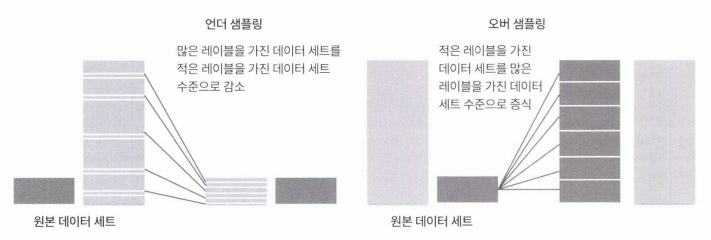
<br><br>
__오버샘플링(oversampling)__
- 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법 <br> 동일한 데이터를 단순히 증식하는 방법은 과적합이 되기 때문에 의미가 없으므로 원본 피처 값들을 아주 약간만 변경하여 증식한다. <br> 대표적으로 __SMOTE(Synthetic Minority Over-sampling Technique)__ 방법이 있다. <br> SMOTE는 적은 데이터 세트에 있는 개별 데이터들의 KNN을 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간 차이가 나는 새로운 데이터를 생성하는 방식이다.
<br><br>
__언더샘플링(undersampling)__
- 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식. <br> 이렇게 정상 데이터를 줄인 상태에서 학습을 수행하면 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있지만, 너무 많은 데이터를 감소하기 때문에 정상 레이블이 오히려 제대로 된 학습을 수행할 수 없다.


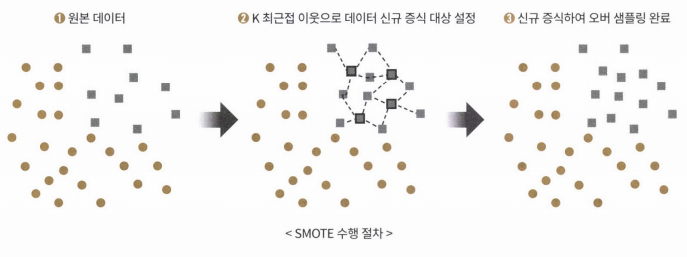

- 이번 절에서 SMOTE를 구현한 대표적 파이썬 패키지 imbalanced-learn을 이용해 데이터 증식


### 데이터 1차 가공 및 모델 학습/예측/평가

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

card_df=pd.read_csv('./creditcard.csv')
card_df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Amount: 신용카드 트랙잭션 금액
- Class: 0이면 정상, 1이면 사기

In [2]:
card_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
from sklearn.model_selection import train_test_split

# 인자로 입력 받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [4]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 인자로 입력 된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy=get_preprocessed_df(df)
    # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features=df_copy.iloc[:,:-1]
    y_target=df_copy.iloc[:,-1]
    # train_test_split()으로 학습/테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, 
                                                     random_state=0, stratify=y_target)
    # 학습/테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test=get_train_test_dataset(card_df) 

In [5]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100) 

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


- 회귀모델

In [6]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test) 
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1] 

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [8]:
get_clf_eval(y_test, lr_pred, lr_pred_proba) 

오차 행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149,    F1: 0.7222, AUC:0.9570


- LGBM 모델

In [9]:
# 인자로 사이킷런 estimator 객체와 학습/테스트 데이터 세트를 입력 받아 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred=model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba) 

In [10]:
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test) 

오차 행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,    F1: 0.8421, AUC:0.9797


- LGBM이 회귀보다 더 높은 성능을 냅니다 ~

### 데이터 분포도 변환 후 모델 학습/예측/평가
왜곡된 분포도를 가지는 데이터를 재가공한 뒤 모델을 다시 테스트

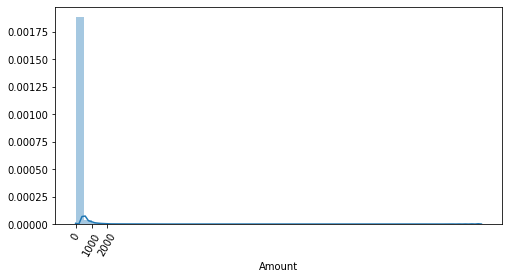

In [11]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,3000,1000), rotation=60)
sns.distplot(card_df['Amount']) 

- 1000이하가 대부분이고 27000까지 사용한 사람이 드물게 있음
- Amount를 표준정규분포 형태로 변환하고 회귀 예측 성능 측정

In [12]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    scaler=StandardScaler()
    amount_n=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    # 변환된 Amount를 Amount_Scaled로 변경 후 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [13]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf=LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test) 

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85263    32]
 [   87    61]]
정확도: 0.9986, 정밀도: 0.6559, 재현율: 0.4122,    F1: 0.5062, AUC:0.7059


- 정규분포 형태로 변환했을 때는 이전과 큰 차이가 없음

#### 로그 변환 - 데이터 분포도가 심하게 왜곡되어 있을 경우 적용
원래 값을 log값으로 변환해 원래 큰 값을 상대적으로 작은 값으로 변환하기 때문에 데이터 분포도의 왜곡을 개선해준다. 넘파이의 log1p() 함수를 이용

In [14]:
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    # 넘파이의 log1p()를 이용해 Amount를 로그 변환
    amount_n=np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [15]:
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test) 

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85065   230]
 [  103    45]]
정확도: 0.9961, 정밀도: 0.1636, 재현율: 0.3041,    F1: 0.2128, AUC:0.6538


- 쬐꼼 더 개선됨

### 이상치 데이터 제거 후 모델 학습/예측/평가
__이상치 찾는 법__: IQR 사분위수 값의 편차를 이용해 box plot을 그림 / IQR: 3사분위수-1사분위수 <br> IQR에 1.5를 곱해 생성된 범위를 이용해 최대, 최소 값을 결정하고 그 범위 안에 속하지 않는 값을 이상치로 간주한다. 경우에 따라 1.5가 아닌 다른 값을 곱할 수도 있음.
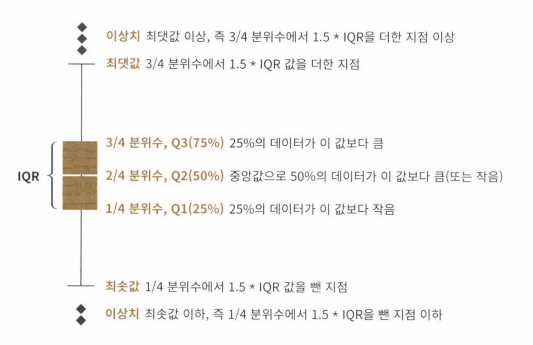

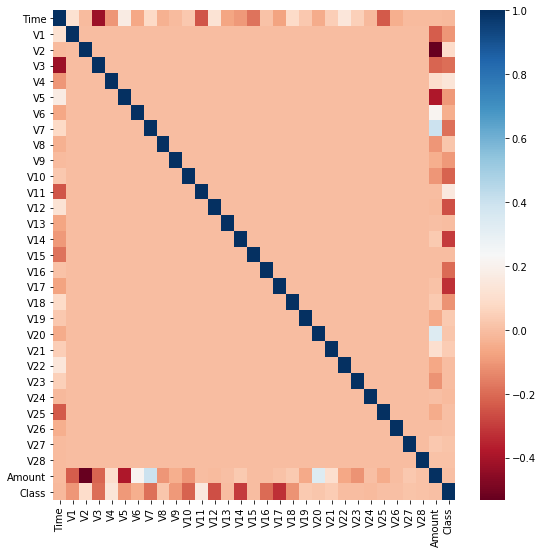

In [16]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr, cmap='RdBu')

- cmap을 RdBu로 설정해 양의 상관관계가 높을수록 색이 진한 파란색에 가깝고, <br>음의 상관관계가 높을수록 색이 진한 빨간색에 가깝게 표현된다.
- 결정 레이블인 Class 피처와 음의 상관관계가 가장 높은 V14, V17중 V14에서만 이상치 제거
    - IQR을 이용해 이상치 검출하는 함수를 만들고 이상치를 찾아 삭제한다. 

In [19]:
import numpy as np
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1사분위와 3사분위 지점을 np.percentile로 구한다.
    fraud=df[df['Class']==1][column]
    quantile_25=np.percentile(fraud.values, 25)
    quantile_75=np.percentile(fraud.values, 75)
    # IQR을 구하고 1.5를 곱해 최대 최소를 구한다
    iqr=quantile_75-quantile_25
    iqr_weight=iqr*weight
    lowest_val=quantile_25 - iqr_weight
    highest_val=quantile_75+iqr_weight
    # 최대보다 크거나 최소보다 작은 값을 이상치 데이터로 간주하고 DataFrame index 반환
    outlier_index=fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

In [20]:
outlier_index=get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 인덱스:', outlier_index) 

이상치 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [21]:
# get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_processed_df(df=None):
    df_copy=df.copy()
    amount_n=np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index=get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [22]:
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LGBM 예측 성능 ###
오차 행렬
[[85065   230]
 [  103    45]]
정확도: 0.9961, 정밀도: 0.1636, 재현율: 0.3041,    F1: 0.2128, AUC:0.6538


- 이상치 제거하고 성능이 눈에 띄게 좋아짐 !

### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
앞서 설치한 imbalanced-learn 패키지의 SMOTE 클래스 사용<br>
반드시 학습 데이터 세트만 오버 샘플링 해야 한다! 

In [23]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=0)
X_train_over, y_train_over=smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts()) 

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199364, 29) (199364,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
Name: Class, dtype: int64


- SMOTE 적용 후 데이터 세트가 학습 전의 거의 두배에 가까운 개수로 데이터가 늘어남
- SMOTE 적용 후 0과 1의 분포가 동일하게 199020개가 됨

In [26]:
lr_clf=LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over, y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, 
                     tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[83317  1978]
 [   15   133]]
정확도: 0.9767, 정밀도: 0.0630, 재현율: 0.8986,    F1: 0.1178, AUC:0.9803


- 정확도가 크게 증가하지만 정밀도가 업무에 적용하지 못할 정도로 엄청 낮아짐

In [27]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show() 

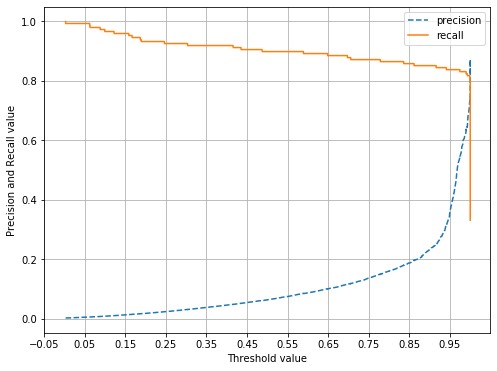

In [28]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1]) 

- 임계값이 0.99 이하에서는 재현율이 좋고 정밀도가 극단적으로 낮음
- 임계값 0.99 이상에서는 반대로 재현율이 대폭 떨어지고 정밀도가 높음

In [29]:
# LGBM 모델에 오버 샘플링 데이터 적용
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, 
                    tgt_train=y_train_over, tgt_test=y_test) 

오차 행렬
[[85284    11]
 [   32   116]]
정확도: 0.9995, 정밀도: 0.9134, 재현율: 0.7838,    F1: 0.8436, AUC:0.9855


- 재현율은 이상치 제거한 데이터보다 높아졌지만 정밀도는 낮아졌음

##### SMOTE를 적용하면 재현율은 높아지지만, 정밀도는 낮아지는 것이 일반적이다! 
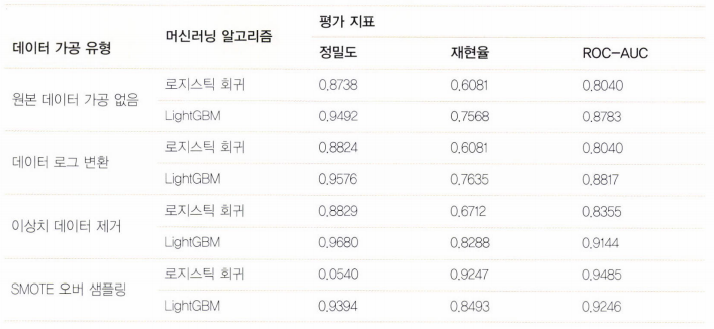

## __04_10 스태킹 앙상블__
---

__스태킹(stacking)__은 여러 알고리즘을 서로 결합해 예측 결과를 도출한다. 즉, 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다. <br><br>
- 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식<br><br>
- 개별적인 기반 모델, 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어 학습하는 최종 메타 모델 2가지 종류의 모델이 필요하다. 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 데이터 세트를 만든다.
<br><br>
- 많이 사용하진 않지만 조금이라도 성능 수치를 높여야 할 경우에 사용된다. 적용한다고 반드시 성능이 좋아지지는 않는다. <br><br>
__여러 개의 모델에 대한 예측값을 합한 후 스태킹 형태로 쌓은 뒤에 이에 대한 예측을 다시 수행__
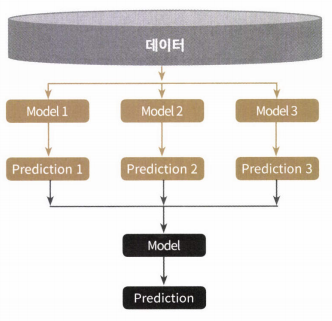


---
__M개의 로우, N개의 피처를 가진 데이터 세트에 스태킹 앙상블을 적용한다고 가정__

1. 학습에 사용할 ML알고리즘 3개를 모델별로 각각 학습 시키고 예측을 수행하면 각각 M개의 로우를 가진 1개 레이블 값을 도출한다.<br>
2. 모델별로 도출된 예측 레이블 값을 합해서(스태킹) 새로운 데이터 세트를 만든다.<br>
3. 스태킹된 데이터 세트에 대해 최종 모델을 적용해 최종 예측을 한다.<br>
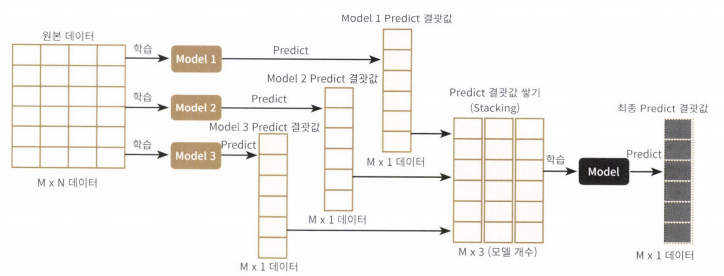


### 기본 스태킹 모델
위스콘신 유방암 데이터에 기본 스태킹 모델 적용

In [31]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
cancer_data=load_breast_cancer()

X_data=cancer_data.data
y_label=cancer_data.target

X_train, X_test, y_train, y_test=train_test_split(X_data, y_label, test_size=0.2, random_state=0) 

In [34]:
# 개별 ML 모델 생성
# 개별모델: KNN, 랜덤포레스트, 결정트리, 에이다부스트 > 최종모델: 로지스틱 회귀
knn_clf=KNeighborsClassifier(n_neighbors=4)
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf=DecisionTreeClassifier()
ada_clf=AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트 학습, 예측할 최종 모델 생성
lr_final=LogisticRegression(C=10)

# 개별 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

# 학습된 개별 모델의 예측 데이터 세트를 반환하고 예측 정확도 측정
knn_pred=knn_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
dt_pred=dt_clf.predict(X_test)
ada_pred=ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [35]:
# 개별 알고리즘의 예측 결과를 피처 값으로!
pred=np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행, 열의 위치 교환 > 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만든다
pred=np.transpose(pred)
print(pred.shape) 

(4, 114)
(114, 4)


In [36]:
lr_final.fit(pred, y_test)
final=lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final))) 

최종 메타 모델의 예측 정확도: 0.9737


### CV 세트 기반의 스태킹


- 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용한다.
<br><br>

__step1__ 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습/테스트용 데이터 생성

    1. 학습용 데이터를 N개의 폴드로 분리((N-1)개는 학습용 폴드, 1개는 검증을 위한 폴드)
    2. 학습용 폴드로 개별 모델 학습
    3. 학습된 개별 모델을 검증 폴드로 예측하고 결과를 별도로 저장
    4. 3번을 계속 반복하면서 개별 모델의 모든 예측 결과를 쌓아 최종 결괏값 생성
    5. 최종 결괏값을 메타 모델의 학습 데이터로 사용
<br><br>
__step 2__ 1단계에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트를 생성. 각 모델이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 예측할 최종 테스트 데이터 세트 생성. 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터를 기반으로 학습한 뒤 최종적으로 생성된 테스트 데이터 세트를 예측하고 원본 테스트 데이터의 레이블 데이터를 기반으로 평가한다.

    1. 각 모델들이 step 1에서 생성한 학습/테스트 데이터를 모두 합해 메타 모델이 사용할 학습/테스트 데이터 세트를 생성
    2. 메타모델이 사용할 데이터 = 최종학습데이터 + 원본 레이블 데이터
    3. 메타모델로 학습, 예측을 수행하고 결과를 도출한다. 결과를 원본 결과와 비교해 평가
    
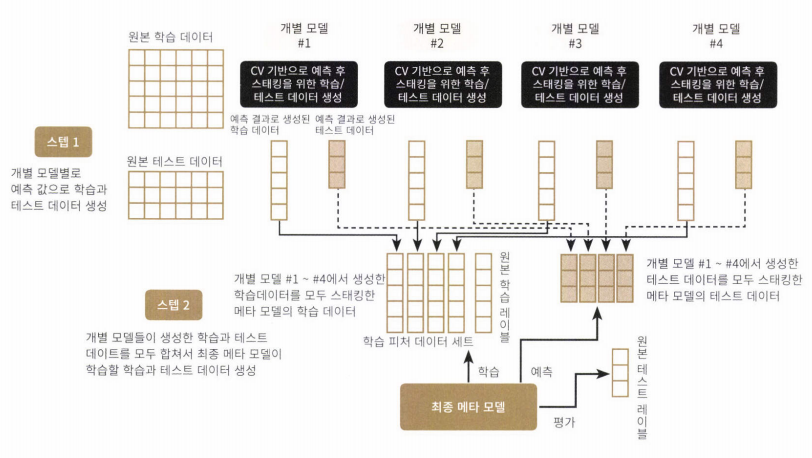

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)
        
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [40]:
knn_train, knn_test=get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test=get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test=get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test=get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [41]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape) 

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [42]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final))) 

최종 메타 모델의 예측 정확도: 0.9737
